**Name : Ziv Shamli   Id: 209188242**  kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment1

**Name : Ravid Masalton Id: 315466771**  kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment1

# Titanic - Assignment 3 (With Assignment 1)

# **Too Long Don't Read**

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In the competition, we built a a predictive model that answers the question: “what sorts of people were more likely to survive?”, by using passenger data (ie name, age, gender, socio-economic class, etc). We preprocessing the data and Delete the irrelevant feature .We to find and create new features. We  found the optimal data slicing between the  train and the validation. Also, We  tried to find the optimal model for solve the titanic problem between SGD Classifier and MLP and find the optimal hyper parameters to the model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


# define plt settings
sns.set_theme()
plt.rcParams["font.size"] =20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [3]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")



In order for us to fill Cabin's column Nans we need to understand Cabin's column values.
After a search about the titanic's cabin numbers I found this image:

![titanic decks](https://user-images.githubusercontent.com/68559039/99043963-ac8ad080-2597-11eb-8ccb-7ee8e841aee8.jpg)


### From looking at the image we can understand:
* the letter at the start of the number refers to which deck the cabin was on.
* the more the letter goes down the alphabet the more the deck (and so the cabin) was closer to the bottom of the ship.
* the letter holds more significance to us then the number.


Also logicaly, the closer the passenger's cabin was to the bottom of the ship the likelihood of him surviving was slim.
I checked wikipedia and the titanic struck the iceberg at night hours (23:40), so it makes sense that the passengers were at their cabins at the same time).
https://en.wikipedia.org/wiki/Sinking_of_the_Titanic



In [4]:
train_data1 = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data1=pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
train_data=train_data1.copy()
test_data=test_data1.copy()
print("The dataframe:")
train_data1

The dataframe:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We can see that the training dataset has 891 rows and 12 columns, which 8 of them are the features we are going to work with.

**Features Description**
* `Survival` - Survival	(0 = No, 1 = Yes)
*  `Pclass` - Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
* `Sex`	- Sex of the passenger (male or female)	
* `Age` -	Age in years	
* `sibsp` -	# of siblings / spouses aboard the Titanic	
* `parch` -	# of parents / children aboard the Titanic	
* `ticket` - Ticket number	
* `fare` - Passenger fare	
* `cabin` - Cabin number	
* `embarked` - Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

# **We will discard the irrelevant columns**


In [5]:
train_data=train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_data=test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

We will check that it was done and check the data

In [6]:
print ("The shape of the train data is (row, column):"+ str(train_data.shape))
print (train_data.info())
print ("The shape of the test data is (row, column):"+ str(test_data.shape))
print (test_data.info())

The shape of the train data is (row, column):(891, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None
The shape of the test data is (row, column):(418, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    f

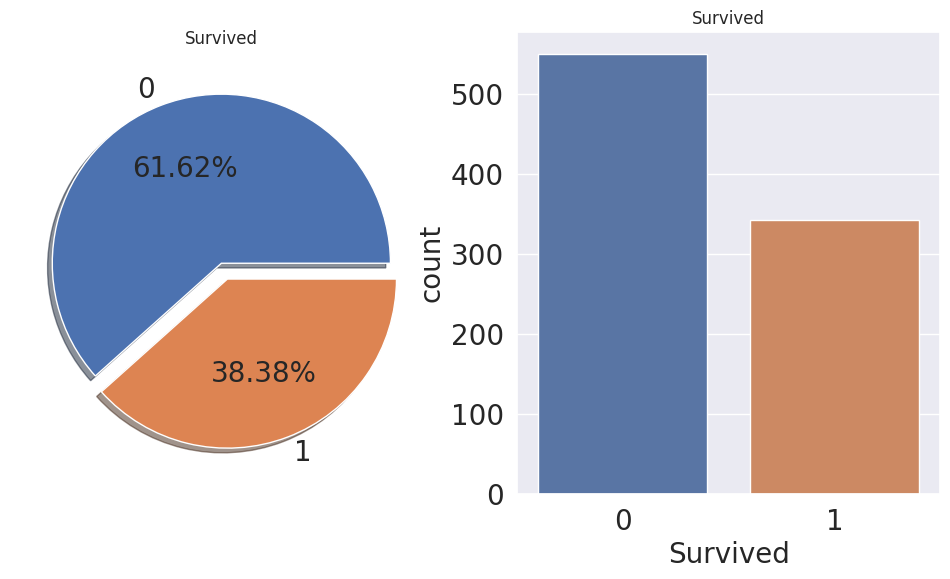

In [7]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figure size as needed

# Graph 1 - Pie Chart
train_data1['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                                autopct='%.2f%%', ax=ax[0], 
                                                shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Graph 2 - Countplot
sns.countplot(x='Survived', data=train_data, ax=ax[1])  # Specify 'x' for the column
ax[1].set_title('Survived')

plt.show()  # Display the plot

You can see in the graph above that almost 40 percent of the passengers survived.

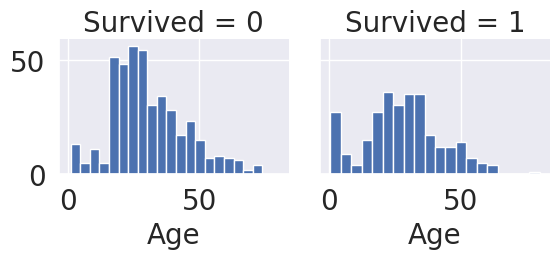

In [8]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

 You can see the distribution of the passengers who survived and did not survive by age.

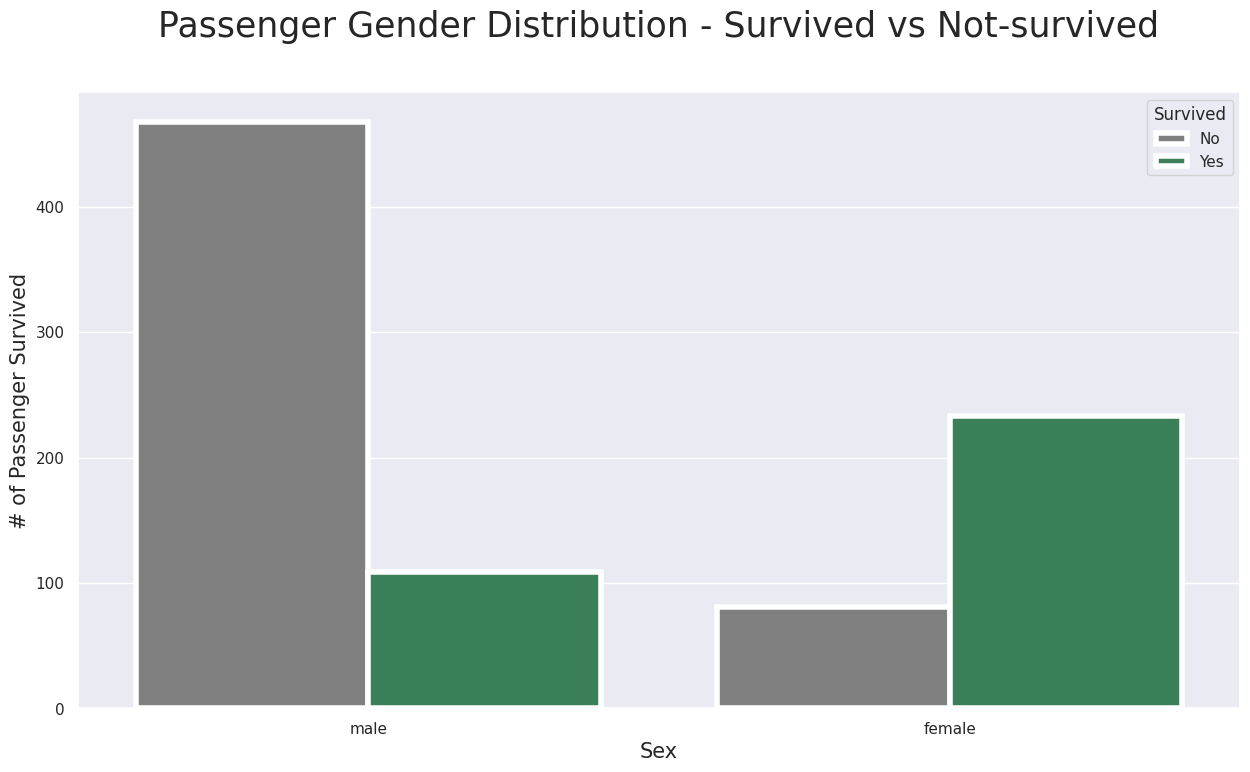

In [9]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train_data1, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

 In the graph above you can see the number of passengers who survived or did not survive by gender.
 Also, most of the male passengers did not survive, however, most of the female passengers did.

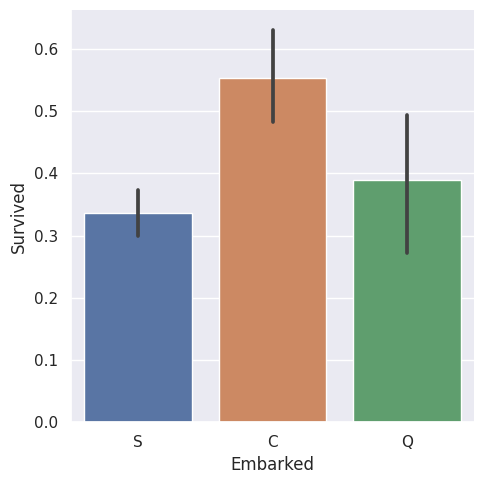

In [10]:
sns.catplot(x='Embarked', y='Survived', data=train_data1, kind="bar")
plt.show()

 We can also see that port Cherbourg had the highest precentage of survivors copmared to other ports

<Axes: xlabel='Pclass', ylabel='Fare'>

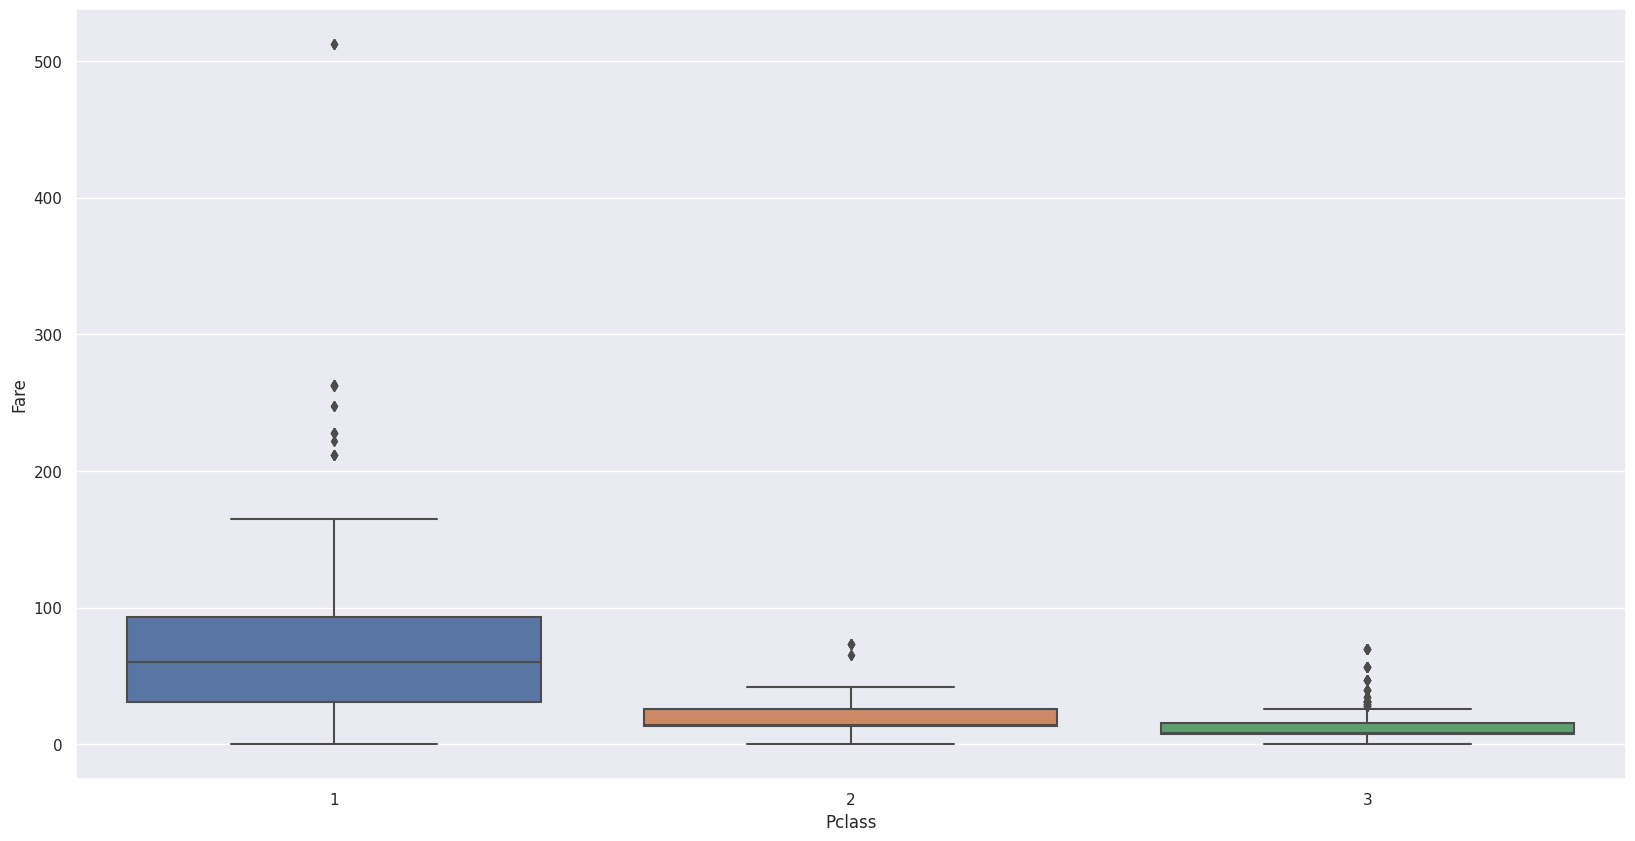

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data=train_data, y="Fare", x="Pclass")

We can see that there is a high correlation between Fare amount and Ticket Class features. We can also see that our data has some outliers in the fare amount column, so we'll have to normalize our data in order to make the outliers less effective in our data on our models, by that we'll be able to create more accurate models.

# **Preprocessing the data**

In [12]:
# count empty values in each column
def count_empty_values_in_each_column(df):
    print('empty values:')
    code = "len(np.where(df[column].isnull())[0])"
    for column in df.columns:
        print(f'{column}: {eval(code)}')


In [13]:
count_empty_values_in_each_column(train_data)
print()
count_empty_values_in_each_column(test_data)

empty values:
Survived: 0
Pclass: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Fare: 0
Cabin: 687
Embarked: 2

empty values:
Pclass: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Fare: 1
Cabin: 327
Embarked: 0


We can see that there is missing data in the age and cbain (fare only in test) columns.

In [14]:
# fill empty values in the dataframe
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True)
    
def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)    

In [15]:
fill_na_median(train_data,'Age')
fill_na_random_pick_column_distribution(train_data,'Cabin')
fill_na_random_pick_column_distribution(train_data,'Embarked')
train_data

/tmp/ipykernel_33/1380481897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(df_not_null[column_name].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,C85,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,D21,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B22,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,B41,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,B22,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [16]:
fill_na_median(test_data,'Age')
fill_na_median(test_data,'Fare')
fill_na_random_pick_column_distribution(test_data,'Cabin')
fill_na_random_pick_column_distribution(test_data,'Embarked')
test_data

/tmp/ipykernel_33/1380481897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(df_not_null[column_name].median(), inplace=True)
/tmp/ipykernel_33/1380481897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,D19,Q
1,3,female,47.0,1,0,7.0000,C54,S
2,2,male,62.0,0,0,9.6875,C62 C64,Q
3,3,male,27.0,0,0,8.6625,C80,S
4,3,female,22.0,1,1,12.2875,B58 B60,S
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,A29,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,F,S
416,3,male,27.0,0,0,8.0500,D10 D12,S


In [17]:
count_empty_values_in_each_column(train_data)
print()
count_empty_values_in_each_column(test_data)

empty values:
Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Cabin: 0
Embarked: 0

empty values:
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Cabin: 0
Embarked: 0


 We managed to complete the missing information.
 
 Now we will try to convert all the information into numerical values.

In [18]:


# dummy encode the categorical variables in the df with method
train_data['Sex_male'] = train_data['Sex'].map({'male': 1, 'female': 0})
train_data=train_data.drop(['Sex'], axis=1)



In [19]:
# dummy encode the categorical variables in the df with method
test_data['Sex_male'] = test_data['Sex'].map({'male': 1, 'female': 0})
test_data=test_data.drop(['Sex'], axis=1)


In [20]:
# using LabelEncoder from sklearn to change Cabin and Embarked to numbers depanding their lables
lb = sklearn.preprocessing.LabelEncoder()
train_data['Cabin'] = lb.fit_transform(train_data['Cabin'])
train_data['Embarked'] = lb.fit_transform(train_data['Embarked'])
# according to the embarked: S-2 , C-0 , Q-
train_data
train_dataFor3=train_data


In [21]:
lb = sklearn.preprocessing.LabelEncoder()
test_data['Cabin'] = lb.fit_transform(test_data['Cabin'])
test_data['Embarked'] = lb.fit_transform(test_data['Embarked'])
# according to the embarked: S-2 , C-0 , Q-
test_data
test_dataFor3=test_data

# **Feature Engineering**

Let's plot a heatmap of the correlation table between the features.

In [22]:
# show absolute correlation between features in a heatmap
def show_heatmap(data):
  plt.figure(figsize=(18,10))
  cor = np.abs(data.corr())
  sns.heatmap(cor, annot=True, cmap=plt.cm.Purples, vmin=-1, vmax=1)
  plt.show()

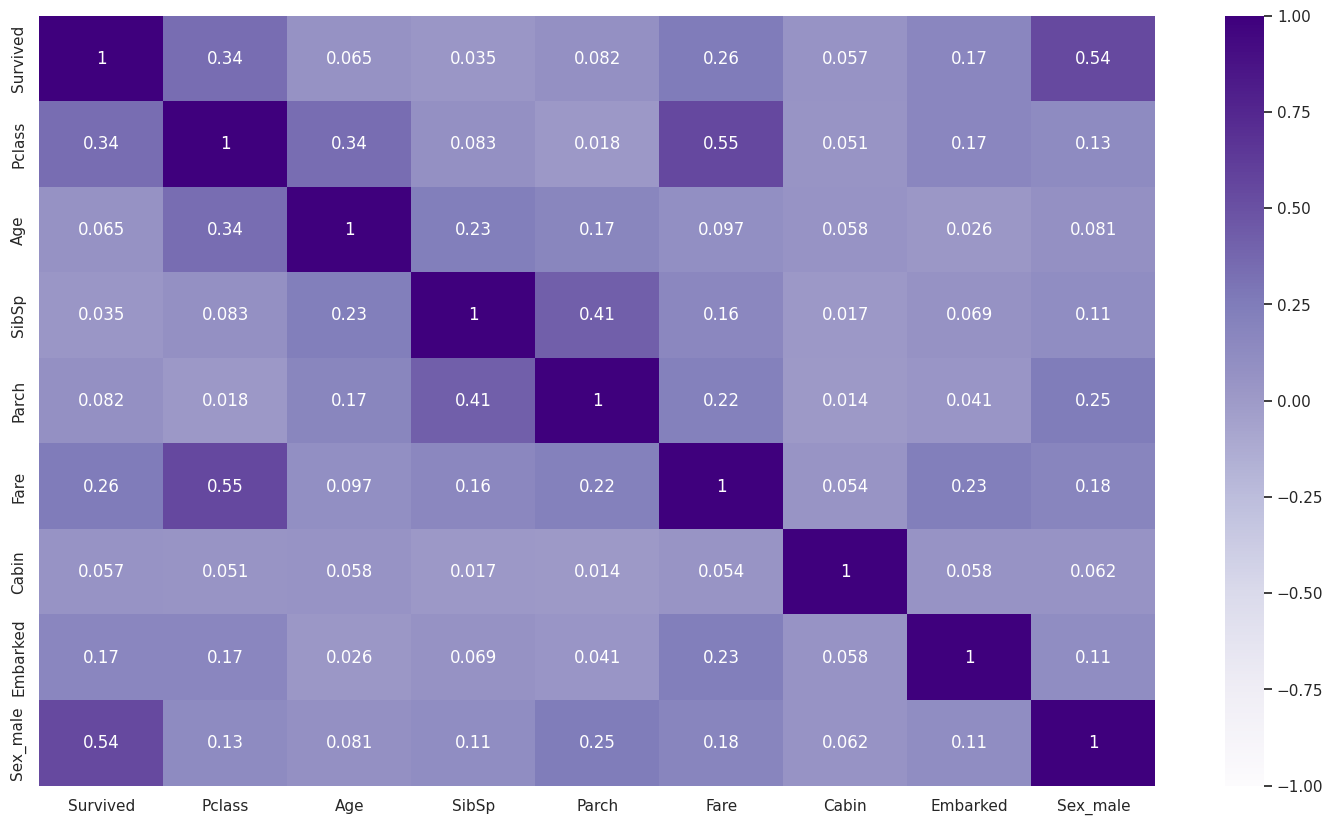

In [23]:
show_heatmap(train_data)

As we expected Sex_male has a really good correlation to the surviving , in addition there seems to be a good correlation between Fare and Pclass and there is some connection between them so we will try to create a new feature from them as FarePerPclass or FareMulPclass and we check who's new feature gives a better correlation with surviving and we pick the higher to be the new feature. 
 the features as follows:
 
FarePerPclass = Fare / Pclass

FareMulPclass = Fare * Pclass

In [24]:
# adding FarePerPclass to train_cp data
train_data_cp = train_data.copy()
train_data_cp.insert(len(train_data.columns), 'FarePerPclass', train_data_cp['Fare'] / train_data_cp['Pclass'])

train_data_cp1 = train_data.copy()
train_data_cp1.insert(len(train_data.columns), 'FareMulPclass', train_data_cp1['Fare'] * train_data_cp1['Pclass'])


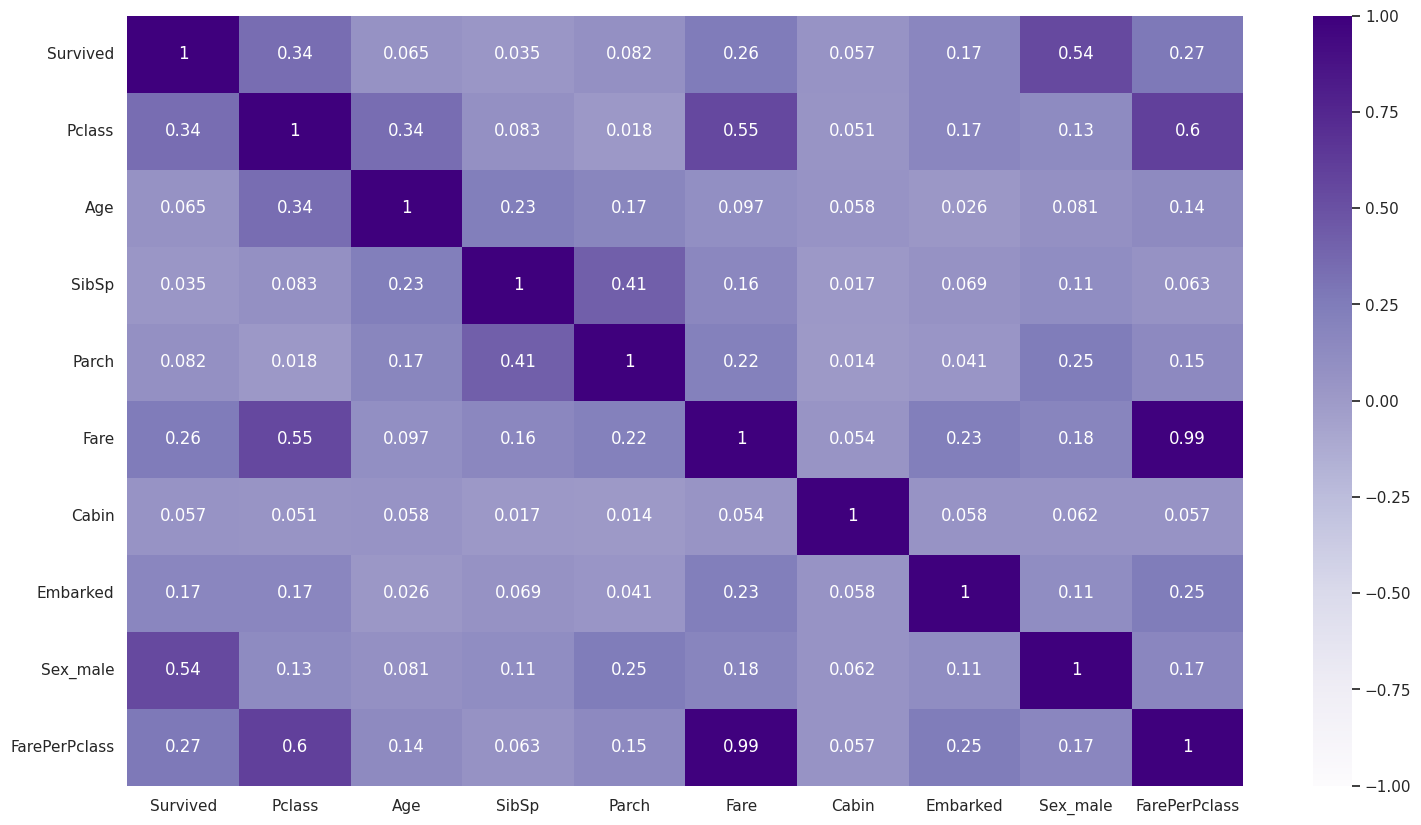

In [25]:
show_heatmap(train_data_cp)

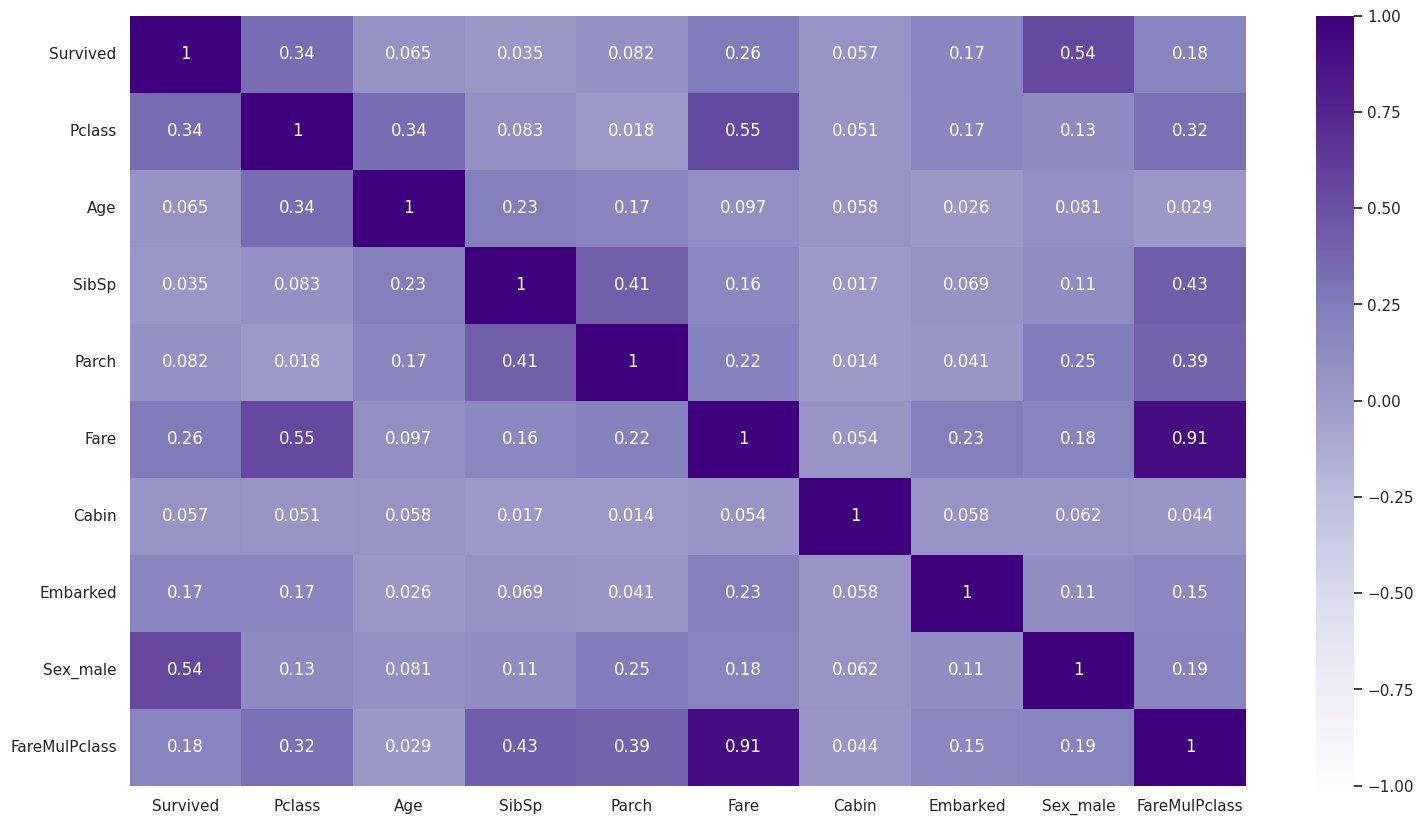

In [26]:
show_heatmap(train_data_cp1)

 we can see that the correlation of FarePerPclass is 0.27 and the correlation of FareMulass is lower 0.18
 therefore we took the FarePerPclass
 The absolute correlation between the new FarePerPclass attribute and the target is 0.27, relative to other attributes in the train_data, this attribute is considered a good 
 correlation to the target, so we will try to integrate train_data_cp in the experiment in the next step.

# **Data Slicing**

In [27]:
# print 4 graphs: ce of train/test and r2 of train/test
# print 4 graphs: mse of train/test and r2 of train/test
def print_graphs_r2_ce(graph_points):
  for k, v in graph_points.items():
    best_value = max(v.values()) if 'R2' in k else min(v.values())
    best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
    color = 'r' if 'train' in k else 'b'
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(list(v.keys()), list(v.values()), color)
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'{k}, best value: x={best_index + 1}, y={best_value}', fontsize=20)
    plt.show()

In [28]:
# plot the score by split and the loss by split for SGD
def plot_score_and_loss_by_split_SGD(x, t):
    graph_points = { 'train_CE': {}, 'val_CE': {}, 'train_R2': {}, 'val_R2': {} }

    for size in range(10, 100, 10):
        x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
        SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train, t_train)
        y_train_prob = SGD_cls.predict_proba(x_train)
        y_test_prob = SGD_cls.predict_proba(x_val)
        y_train = SGD_cls.predict(x_train)
        y_val = SGD_cls.predict(x_val)
        graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
        graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
        graph_points['train_R2'][size/100] = SGD_cls.score(x_train, t_train)
        graph_points['val_R2'][size/100] = SGD_cls.score(x_val, t_val)
    print_graphs_r2_ce(graph_points)



In [29]:
def plot_score_and_loss_by_split_MLP(x, t):
    graph_points = { 'train_CE': {}, 'val_CE': {}, 'train_R2': {}, 'val_R2': {} }

    for size in range(10, 100, 10):
        x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
        MLP_cls =pipeline.make_pipeline(preprocessing.StandardScaler(), neural_network.MLPClassifier(
    activation='logistic',
     solver='sgd', alpha=0, max_iter=10000
     )).fit(x_train, t_train)

        y_train_prob = MLP_cls.predict_proba(x_train)
        y_test_prob = MLP_cls.predict_proba(x_val)
        y_train = MLP_cls.predict(x_train)
        y_val = MLP_cls.predict(x_val)
        graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
        graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
        graph_points['train_R2'][size/100] = MLP_cls.score(x_train, t_train)
        graph_points['val_R2'][size/100] = MLP_cls.score(x_val, t_val)
    print_graphs_r2_ce(graph_points)



In [30]:
t = train_data['Survived'].copy()
X = train_data.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,3,22.0,1,0,7.2500,81,2,1
1,1,38.0,1,0,71.2833,81,0,0
2,3,26.0,0,0,7.9250,97,2,0
3,1,35.0,1,0,53.1000,55,2,0
4,3,35.0,0,0,8.0500,20,2,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,29,2,1
887,1,19.0,0,0,30.0000,30,2,0
888,3,28.0,1,2,23.4500,20,2,0
889,1,26.0,0,0,30.0000,60,0,1


# **Regular Train Data (without new feature)**

# **Regular Train Data (without new feature)** SGD

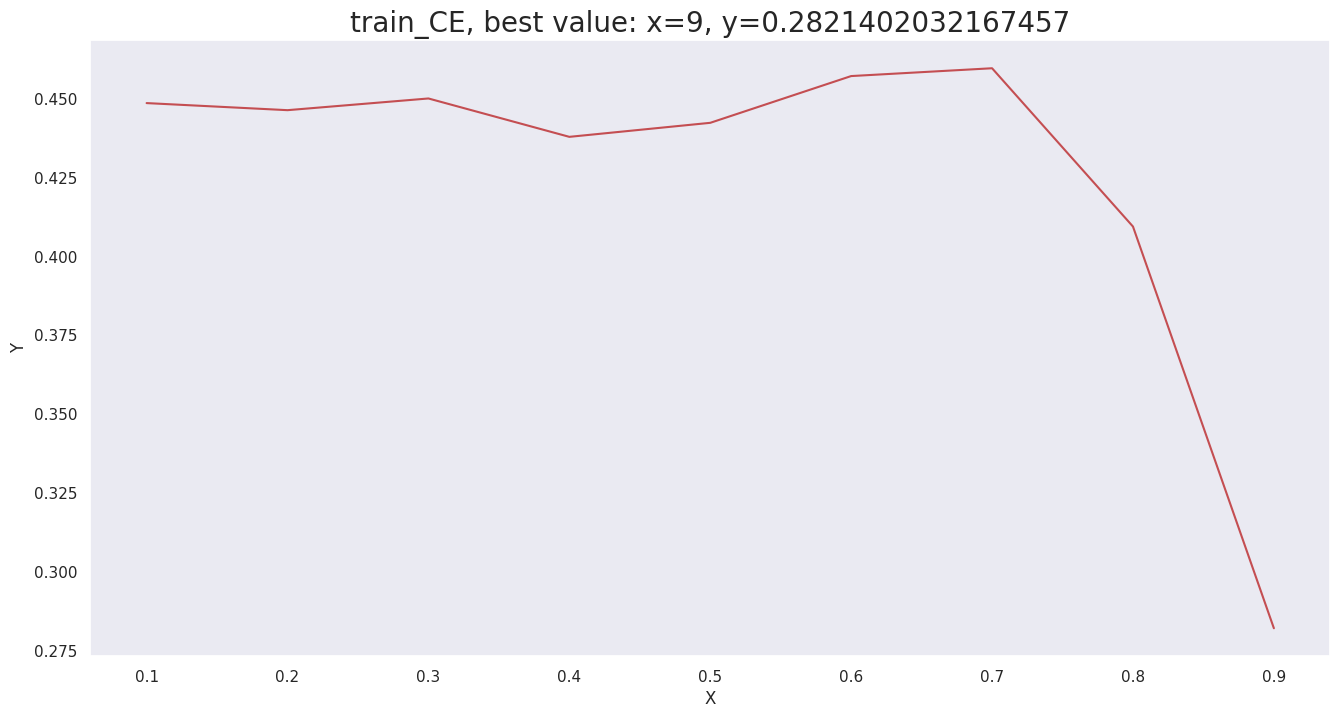

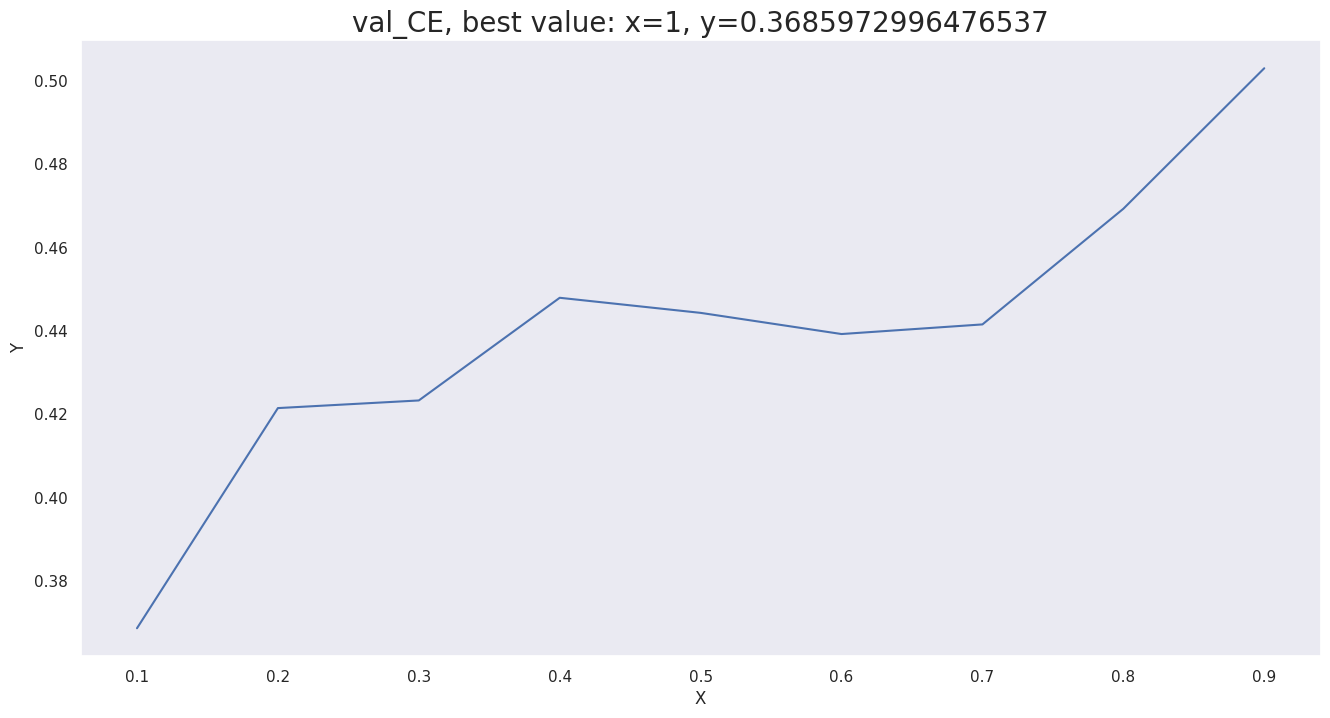

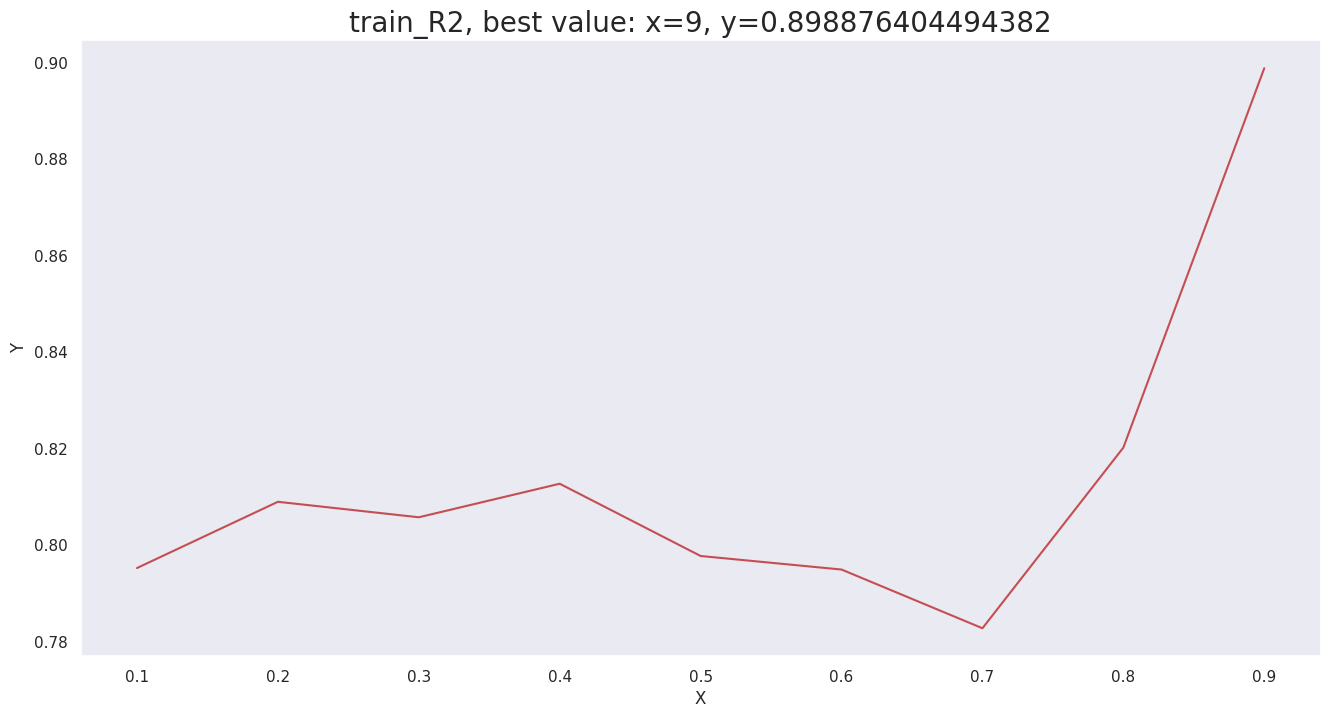

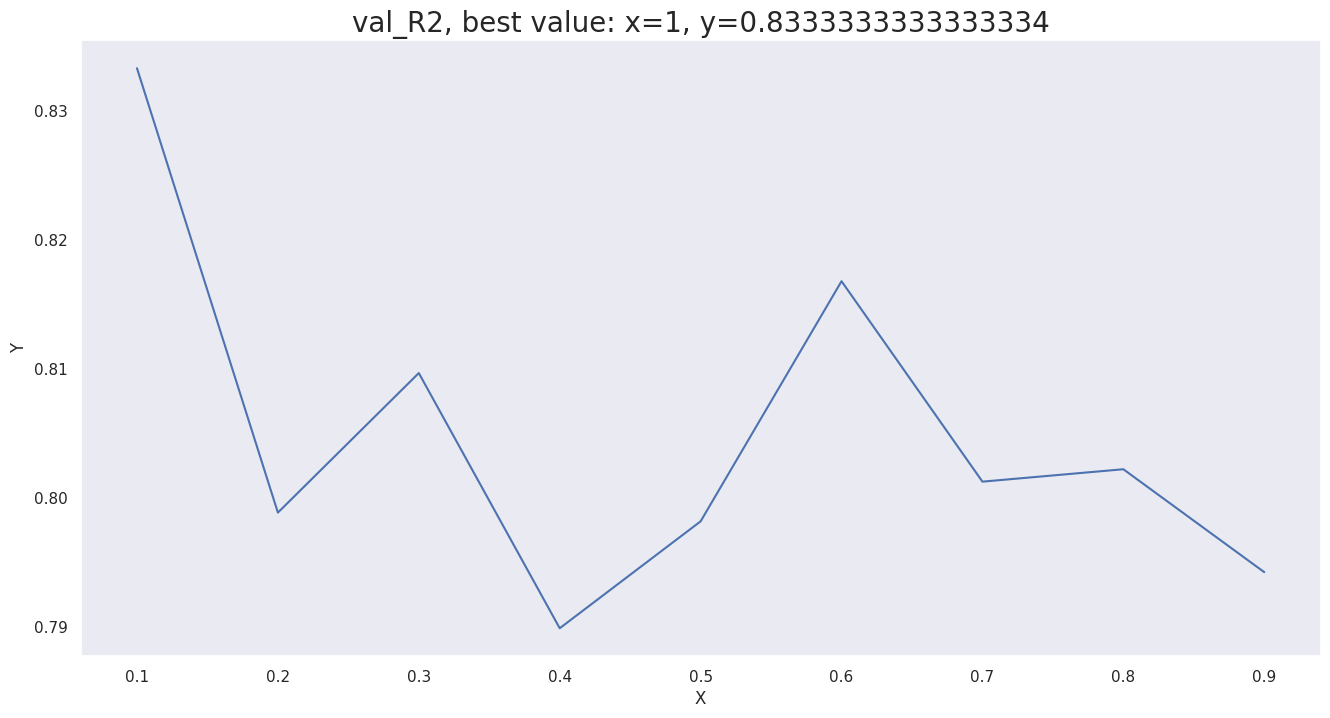

In [31]:
plot_score_and_loss_by_split_SGD(X, t)


# **Regular Train Data (without new feature)** MLP

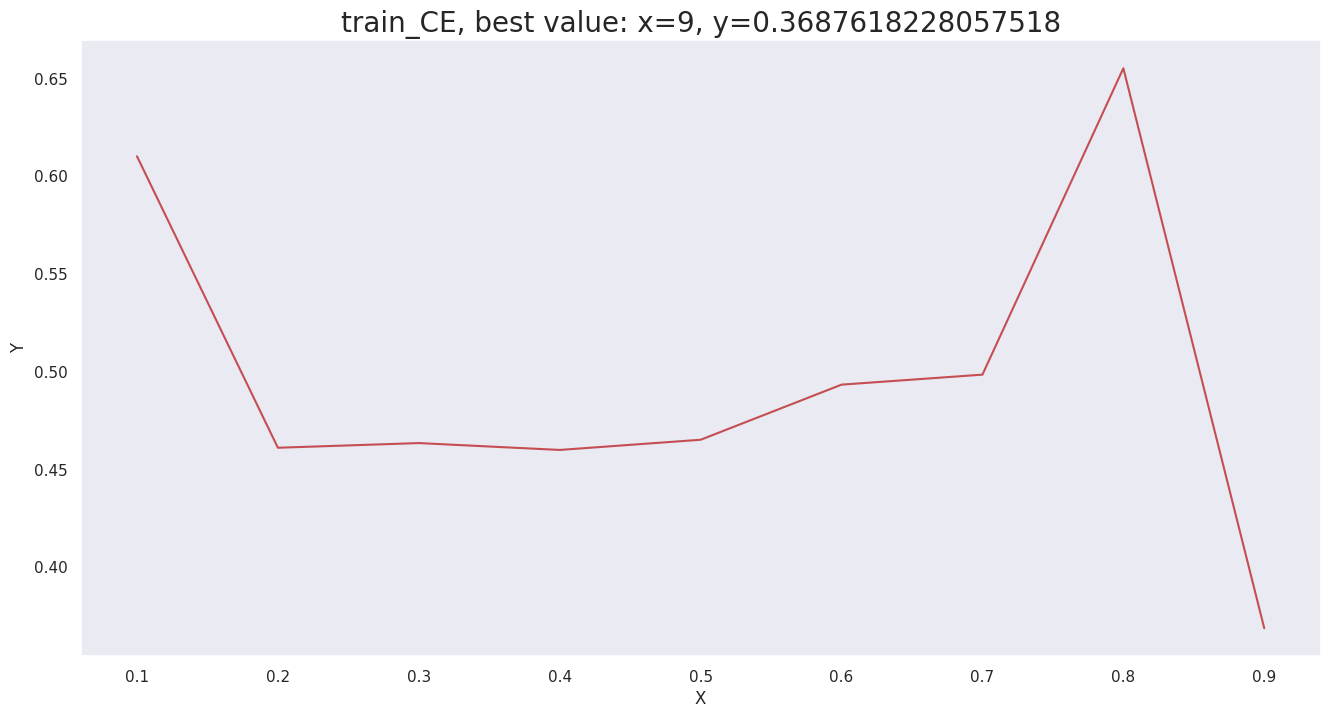

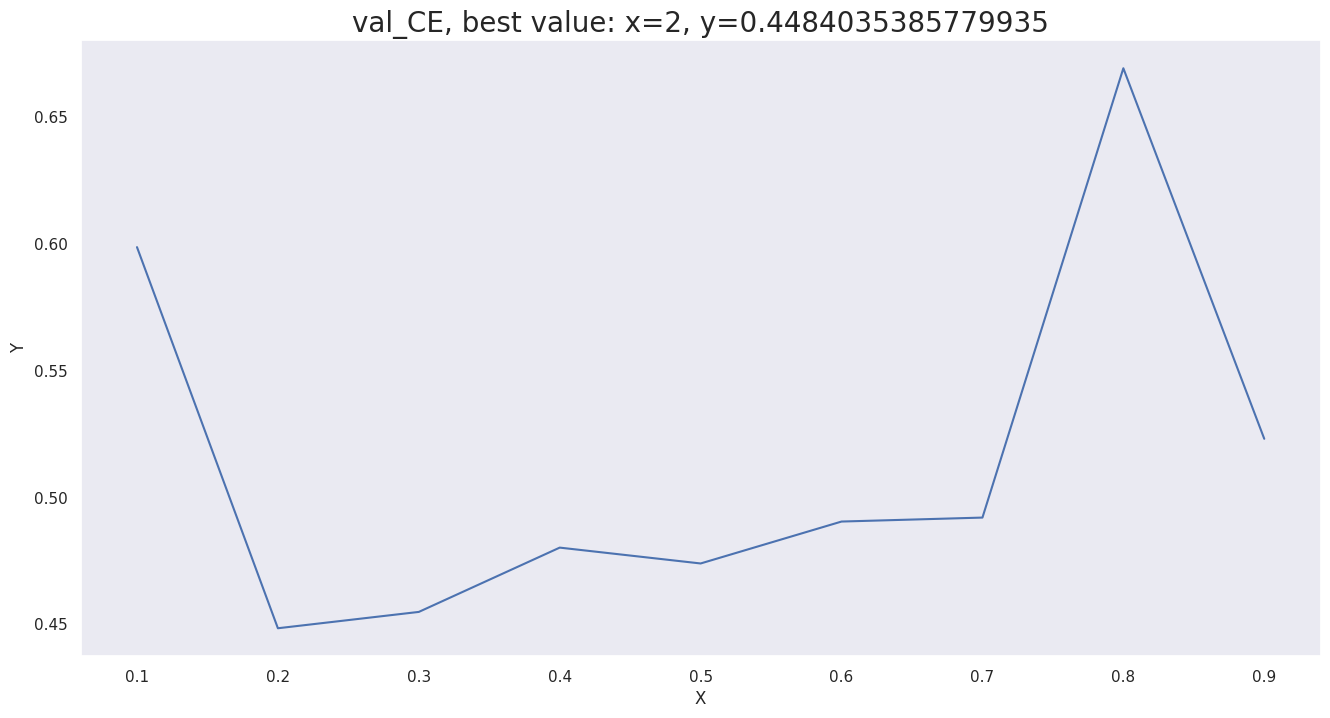

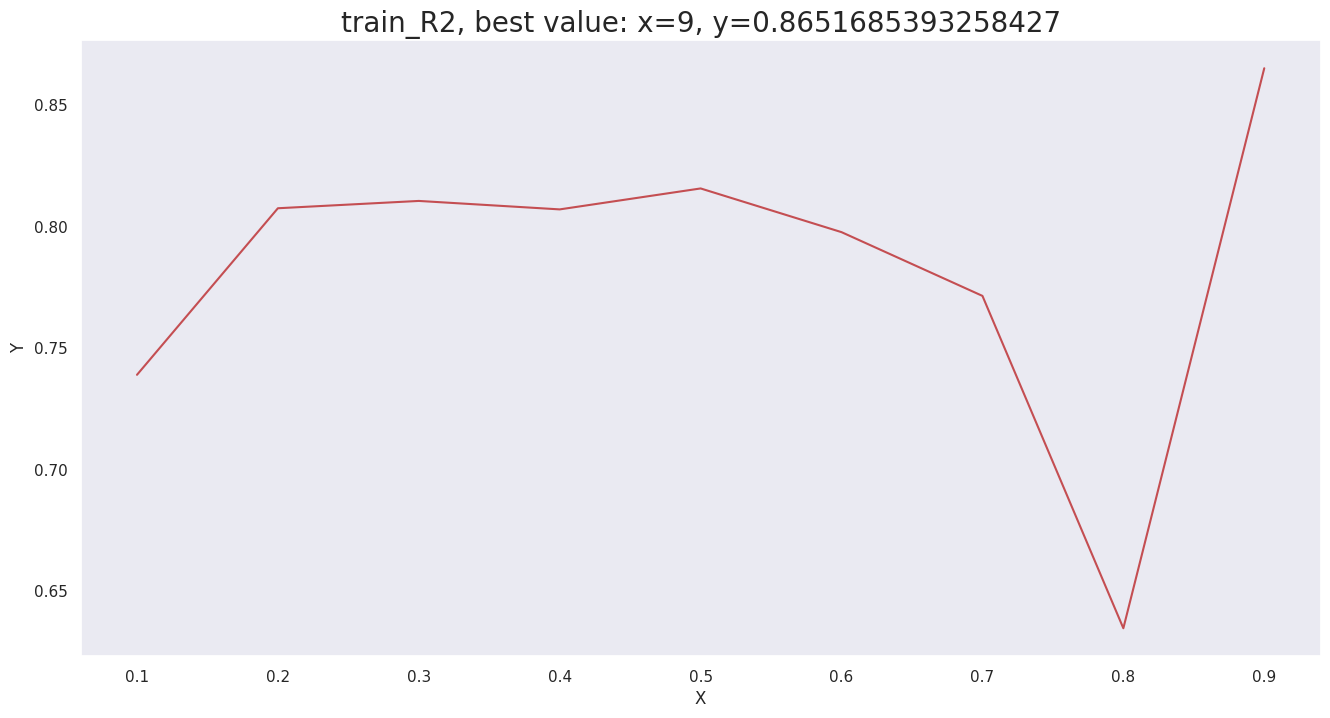

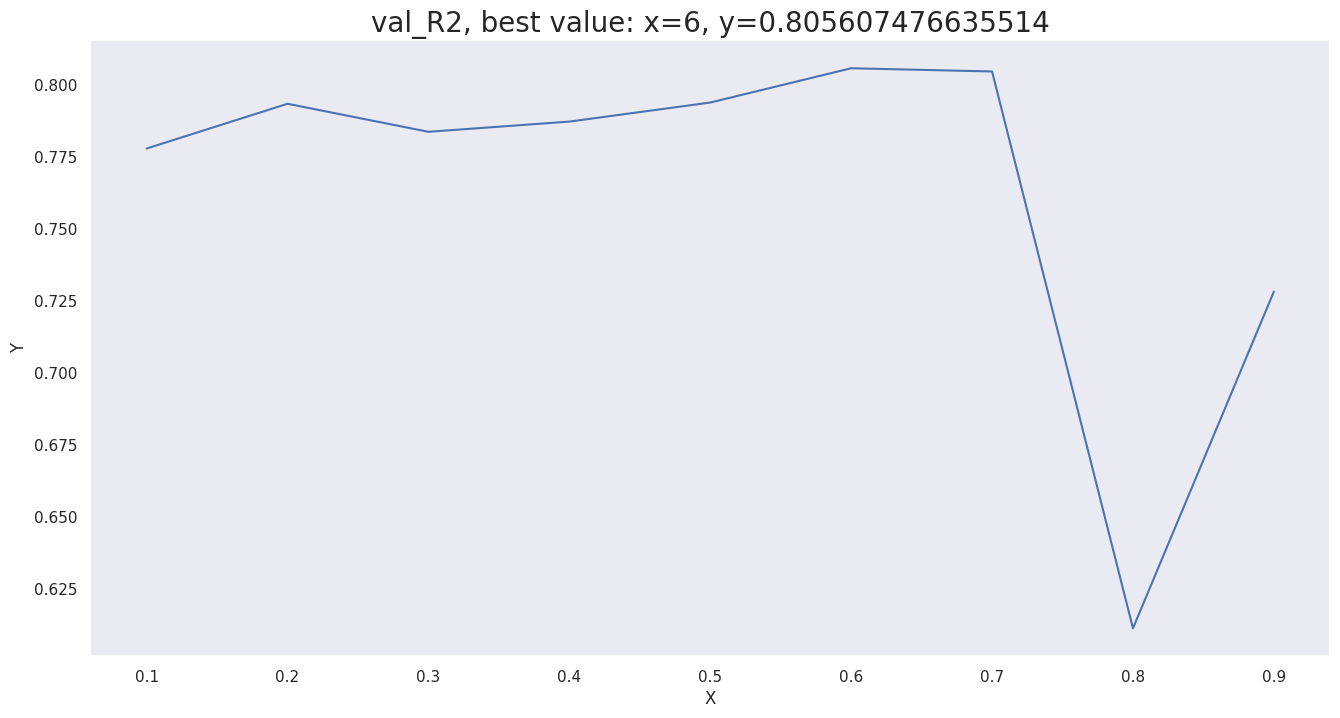

In [32]:
plot_score_and_loss_by_split_MLP(X, t)

# **Train Data with new feature**

In [33]:
# divide the data to features and target
XNF= train_data_cp.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('XNF')
display(XNF)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


XNF


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male,FarePerPclass
0,3,22.0,1,0,7.2500,81,2,1,2.416667
1,1,38.0,1,0,71.2833,81,0,0,71.283300
2,3,26.0,0,0,7.9250,97,2,0,2.641667
3,1,35.0,1,0,53.1000,55,2,0,53.100000
4,3,35.0,0,0,8.0500,20,2,1,2.683333
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,29,2,1,6.500000
887,1,19.0,0,0,30.0000,30,2,0,30.000000
888,3,28.0,1,2,23.4500,20,2,0,7.816667
889,1,26.0,0,0,30.0000,60,0,1,30.000000


# **Train Data with new feature** SGD

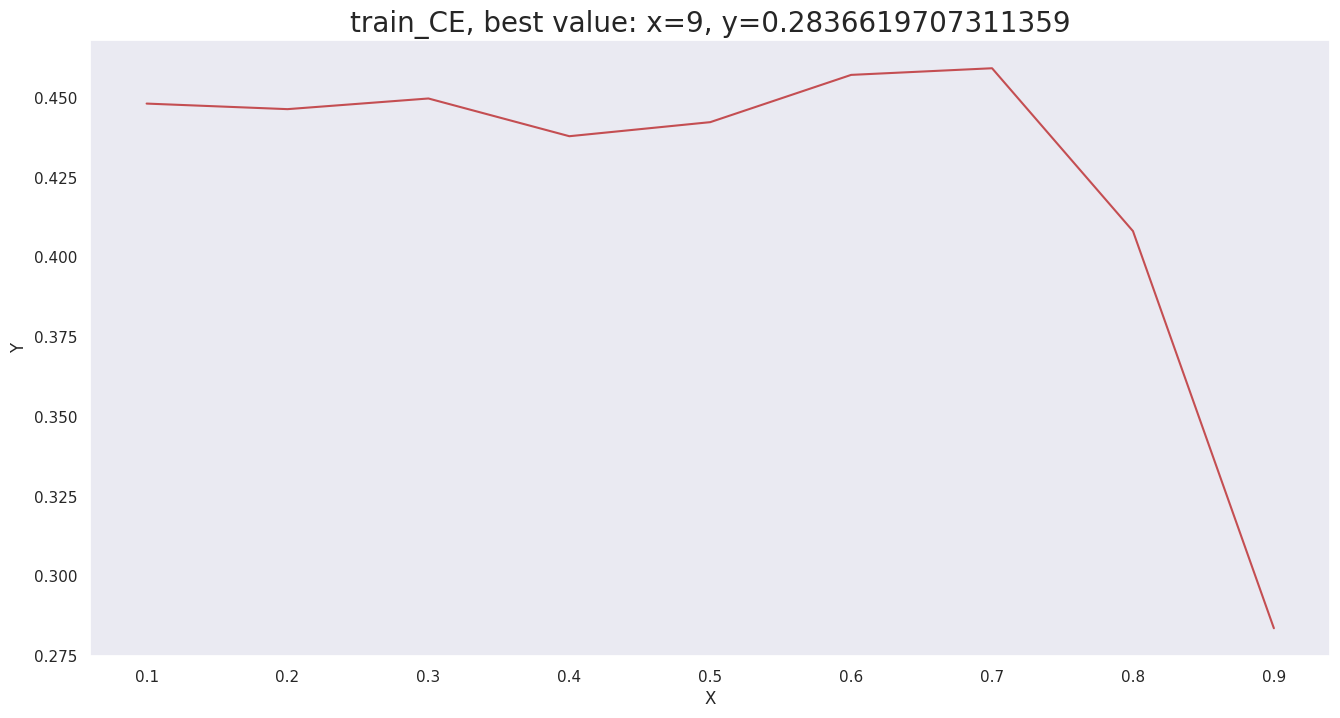

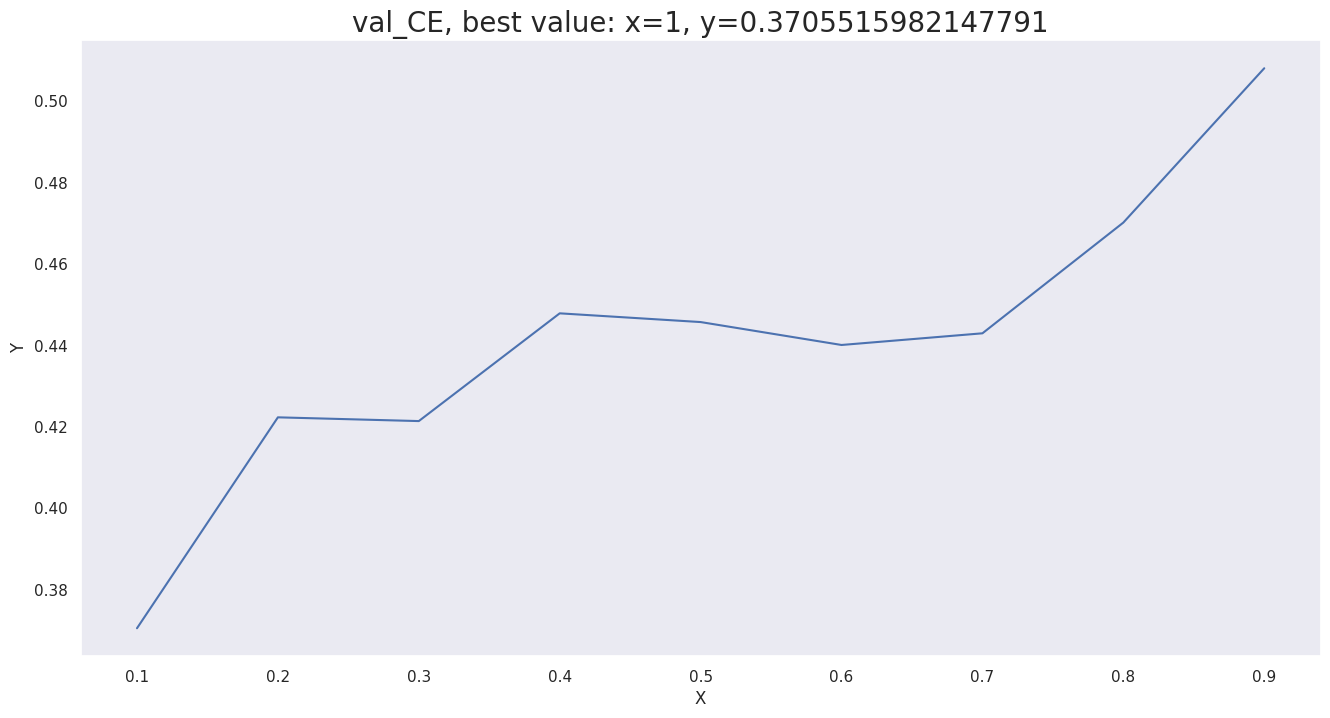

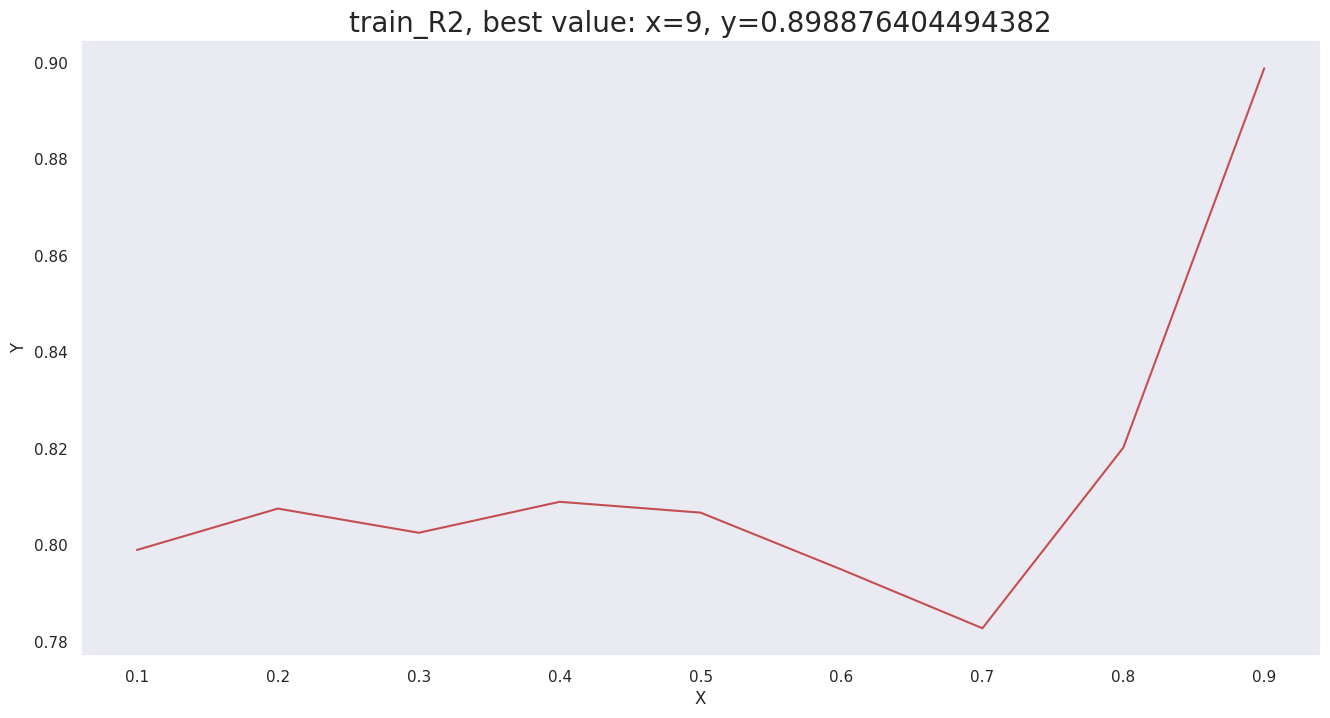

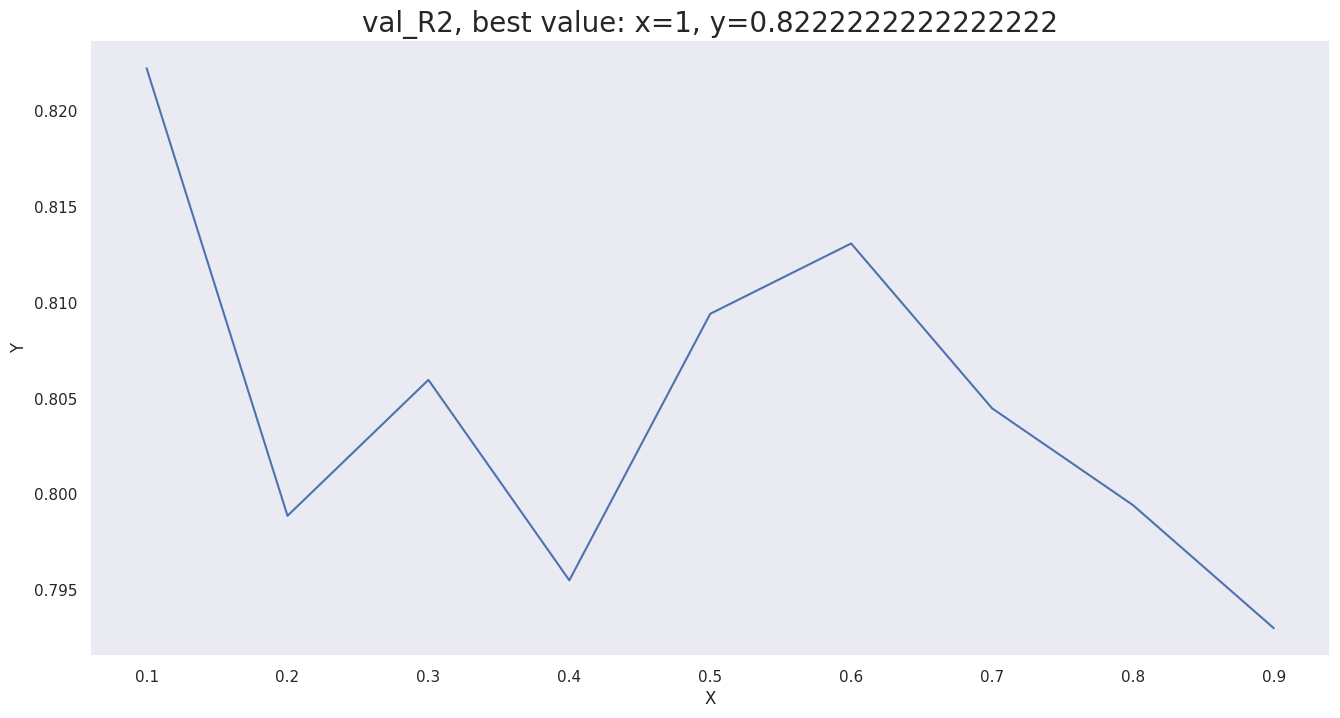

In [34]:
plot_score_and_loss_by_split_SGD(XNF, t)

# **Train Data with new feature** MLP

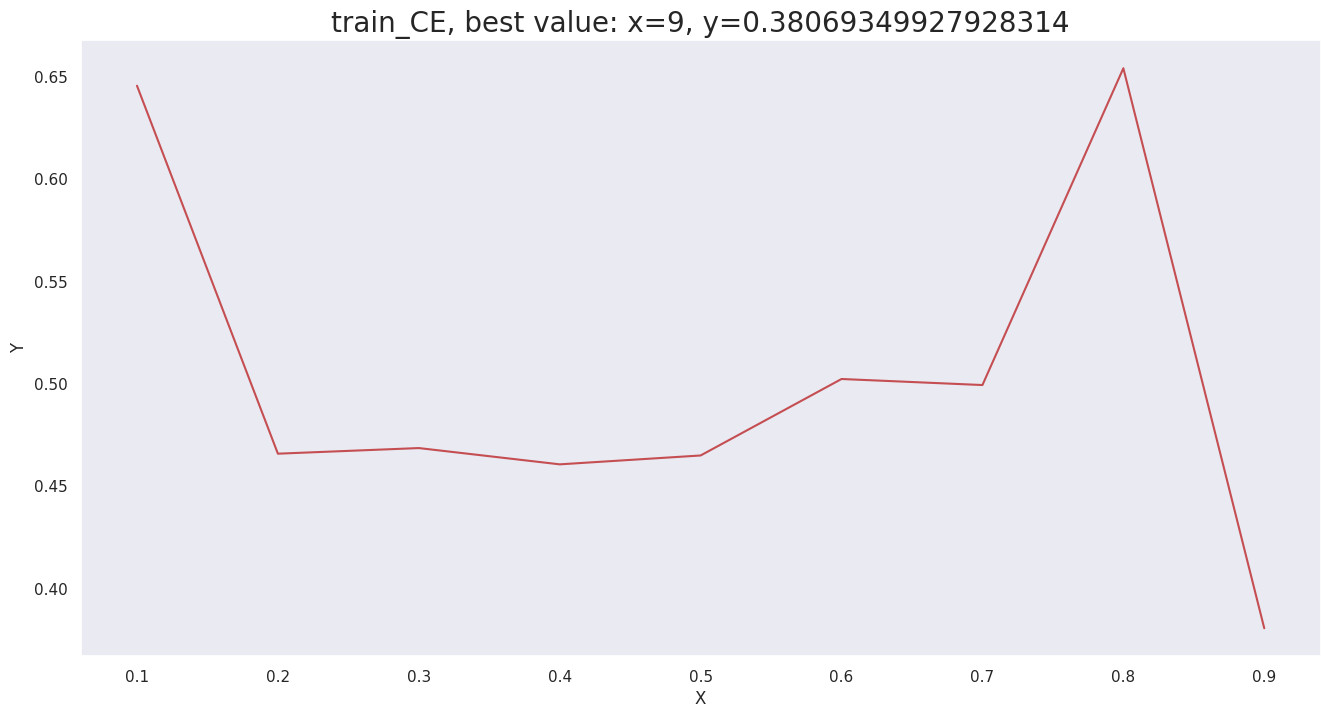

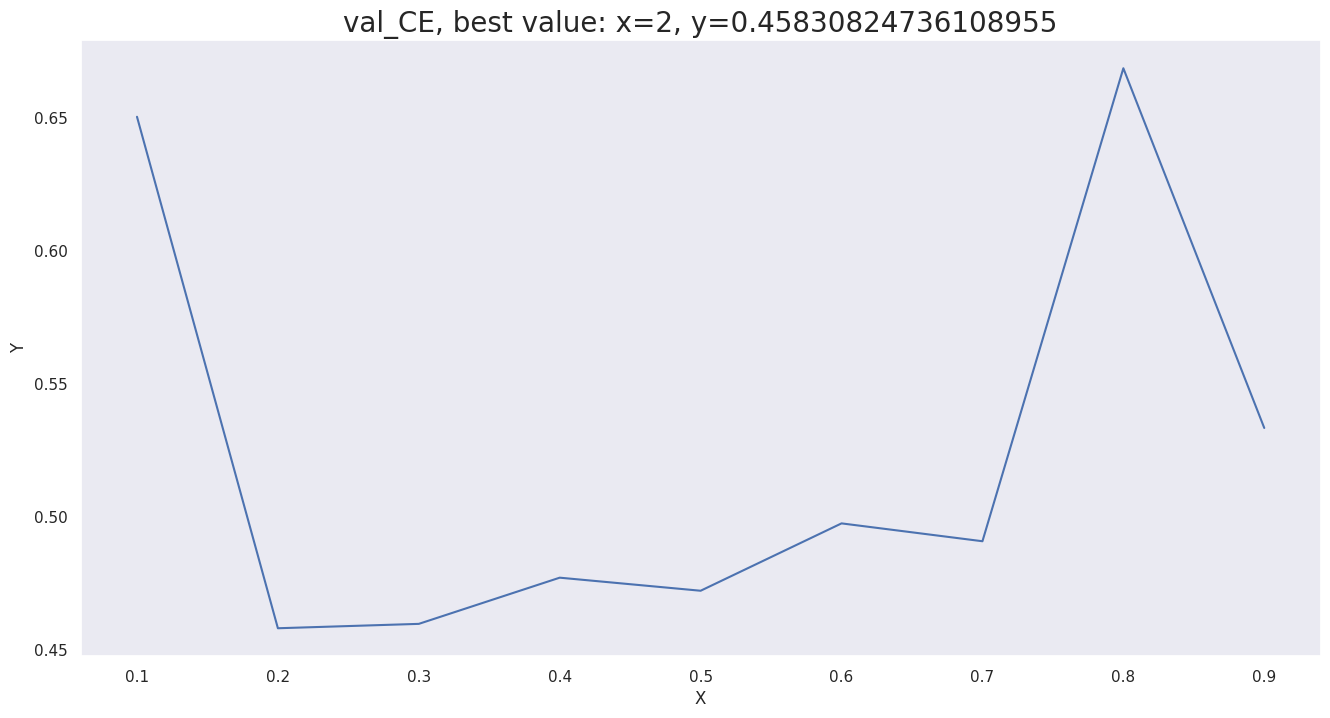

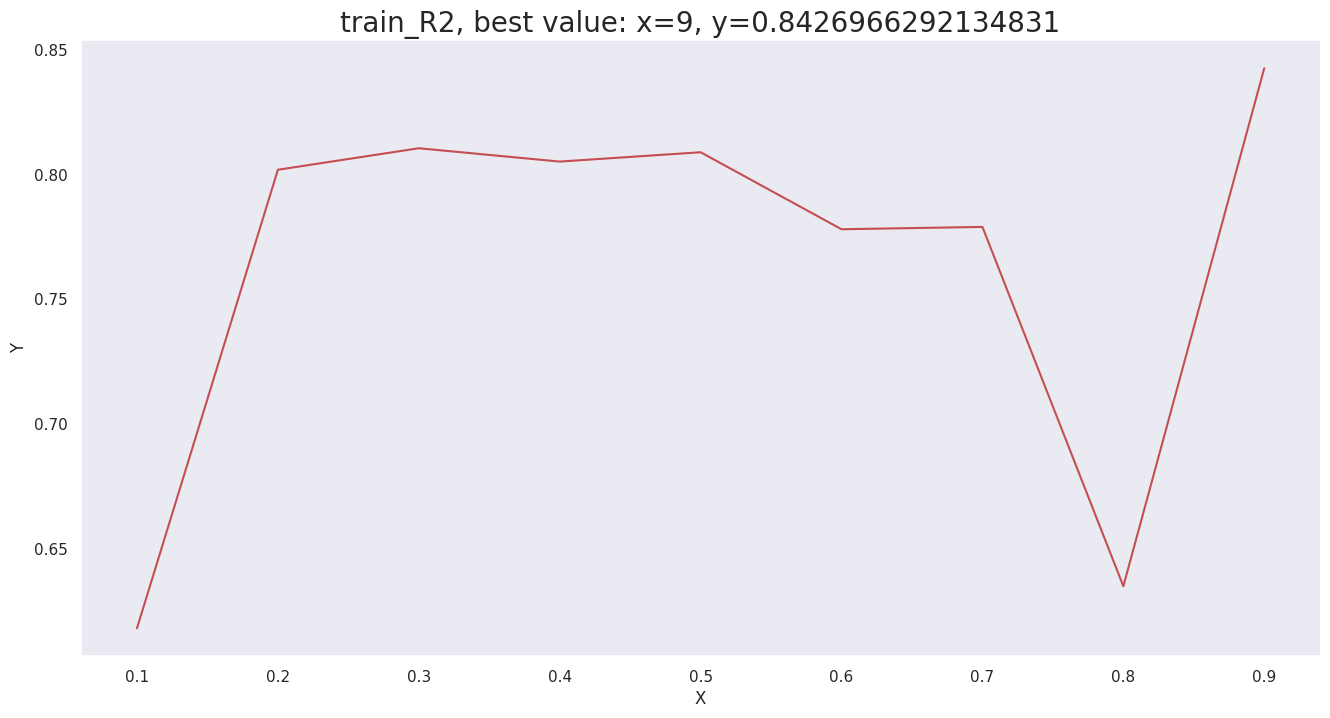

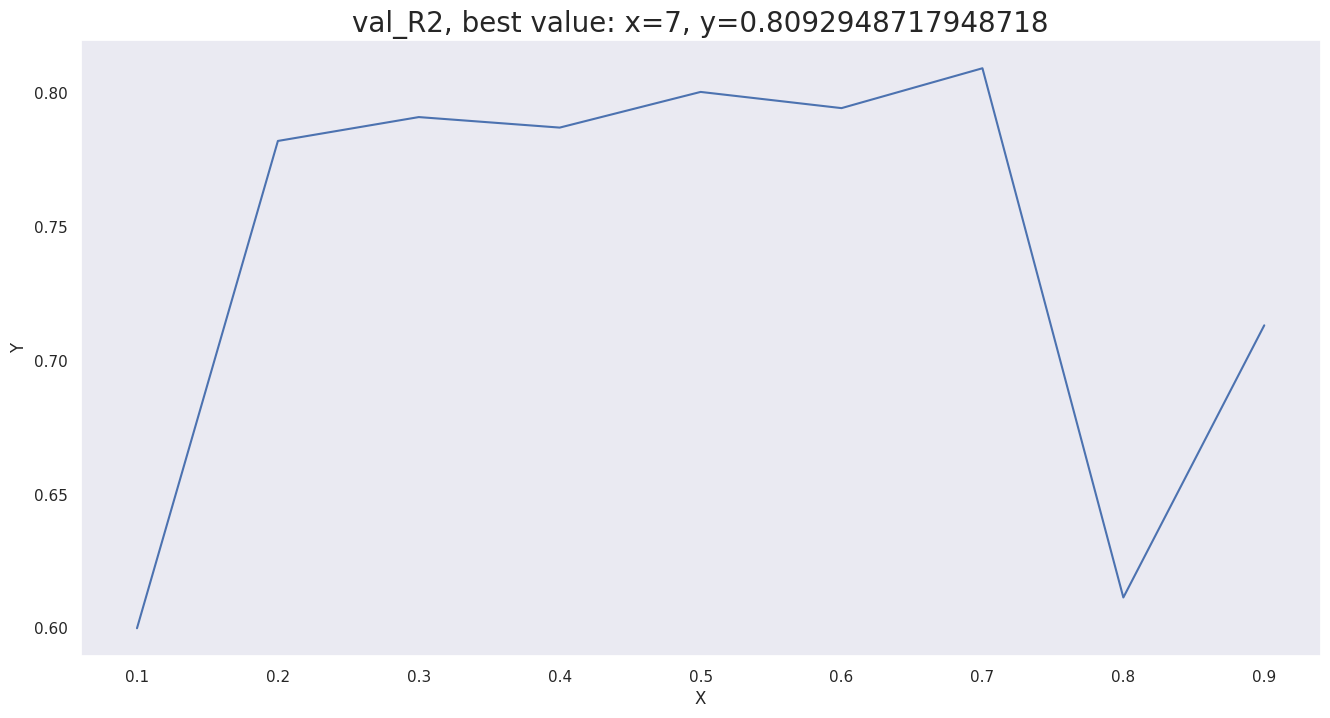

In [35]:
plot_score_and_loss_by_split_MLP(XNF, t)

#  Result:
As we can see when the division is 10% validation and 90% training we got the lowest loss and the highest R^2 for both training and validation. Also, when we added a new feature, the loss increased and R^2 decreased, therefore we decided to give up the new feature.


# **Chosing the model (SGD Classifier vs MLP vs Logistic Regression) by model Accuracy**

In [36]:
# split the train data to 90% train and 10% validation
x_train, x_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=0.1, random_state=42)


# Define the models
hp_models = {'SGDClassifier': SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01),  
             'MLPClassifier': MLPClassifier(activation='logistic',
     solver='sgd')}

def show_accuracy_by_model(X_train, t_train, X_val, t_val, models):
    accuracy_df = pd.DataFrame(columns=['model_name', 'split', 'accuracy'])
    for model_name, model in models.items():
        model_pipe = make_pipeline(preprocessing.StandardScaler(), model)
        model_pipe.fit(X_train, t_train)
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'train', model_pipe.score(X_train, t_train)]
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'val', model_pipe.score(X_val, t_val)]
    fig = px.bar(accuracy_df, x='model_name', y='accuracy', color='split', barmode='group') 
    display(fig)
show_accuracy_by_model(x_train, t_train, x_val, t_val, hp_models)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


# **Chosing the model (SGD Classifier vs MLP vs Logistic Regression) by model Loss**

In [37]:
# Corrected models
hp_models = {'SGDClassifier': SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01),  
             'MLPClassifier': MLPClassifier()}

def show_Loss_by_model(X_train, t_train, X_val, t_val,models):
    accuracy_df = pd.DataFrame(columns=['model_name', 'split', 'loss'])
    for model_name, model in models.items():
        model_pipe = make_pipeline(preprocessing.StandardScaler(), model)
        model_pipe.fit(X_train, t_train)
        y_train_prob = model_pipe.predict_proba(X_train)
        y_test_prob = model_pipe.predict_proba(X_val)
        y_train = model_pipe.predict(X_train)
        y_val = model_pipe.predict(X_val)
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'train', metrics.log_loss(t_train, y_train_prob)]   
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'val', metrics.log_loss(t_val, y_test_prob)] 
    fig = px.bar(accuracy_df, x='model_name', y='loss', color='split', barmode='group') 
    display(fig)

# Assuming x_train, t_train, x_val, t_val are defined somewhere
show_Loss_by_model(x_train, t_train, x_val, t_val,hp_models)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# **Comparison results (loss and accuracy):**

We made a comparison between two models: SGD classifier and MLP
According to two criteria which are the loss and the accuracy.
As you can see from the graphs, it appears that when we performed the SGD model, the accuracy was higher than in the MLP model in both the training and validation groups.
Furthermore, the loss result in the SGD model was lower than in the MLP model in both the training and validation groups.
That's why we decided to use the SGD classifier model

# **Chosing Hyper-Parameters**

Now we will find hyperparameters suitable for SGD Classifier that will yield accurate prediction results.
We chose the following hyperparameters:
* Learning rate
* Epochs

# Compare Accuracy between  Learning Rates

In [38]:


# Define the models
hp_models = {'SGDClassifier_Learning_rate_0.01': SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01),  
             'SGDClassifier_Learning_rate_0.001': SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.001),
            'SGDClassifier_Learning_rate_0.1': SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant',eta0=0.1)}

show_accuracy_by_model(x_train, t_train, x_val, t_val, hp_models)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Compare Loss between  Learning Rates

In [39]:
show_Loss_by_model(x_train, t_train, x_val, t_val,hp_models)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# **Comparison results:**
We made a comparison between three different learning rates: 0.001, 0.01, 0.1
As you can see from the run we tested when the learning rate is equal to 0.01 the accuracy in the validation group was the highest and in addition the loss was the lowest among the three.
That's why we chose: learning rate=0.01.

# Compare Accuracy between Epochs

In [40]:

# Define the models
hp_models = {'SGDClassifier_IterMax_10000': SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01,max_iter=10000),
             'SGDClassifier_IterMax_20000': SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01,max_iter=20000),
            'SGDClassifier_IterMax_40000': SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01,max_iter=40000)}

show_accuracy_by_model(x_train, t_train, x_val, t_val, hp_models)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Compare Loss between Epochs

In [41]:
show_Loss_by_model(x_train, t_train, x_val, t_val,hp_models)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# **Comparison results:**
We made a comparison between three different Epochs sizes: 10000, 20000, 40000
As you can see from the run we tested, the accuracy came out equal between the three sizes of Epochs
In contrast, when Epoch=40000 he received the lowest loss among the three.
That's why we chose to use Epoch=40000.

# **Classification**

**SGD model with Regular Train Data.**

In [42]:
# split the train data to 90% train and 10% validation
x_train, x_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=0.1, random_state=42)

In [43]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01,max_iter=40000)).fit(x_train, t_train)
y_train_prob = SGD_cls.predict_proba(x_train)
y_test_prob = SGD_cls.predict_proba(x_val)
y_train = SGD_cls.predict(x_train)
y_test = SGD_cls.predict(x_val)

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(x_train, t_train))
print('Accuracy score on validation', SGD_cls.score(x_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on validation', metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.7990012484394506
Accuracy score on validation 0.8333333333333334

CE on train 0.44842565431471987
CE on validation 0.37376046558860687


In [44]:
test_data

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,3,34.5,0,0,7.8292,50,1,1
1,3,47.0,1,0,7.0000,36,2,0
2,2,62.0,0,0,9.6875,39,1,1
3,3,27.0,0,0,8.6625,42,2,1
4,3,22.0,1,1,12.2875,16,2,0
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,3,2,1
414,1,39.0,0,0,108.9000,22,0,0
415,3,38.5,0,0,7.2500,68,2,1
416,3,27.0,0,0,8.0500,48,2,1


In [45]:
# predict the test with SGDClassifier
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.001,max_iter=10000)).fit(X, t)
submission_preds = SGD_cls.predict(test_data)

In [46]:
# create the submission file
#submission['Survived'] = submission_preds
#submission.to_csv('submission.csv', index=False)
#submission

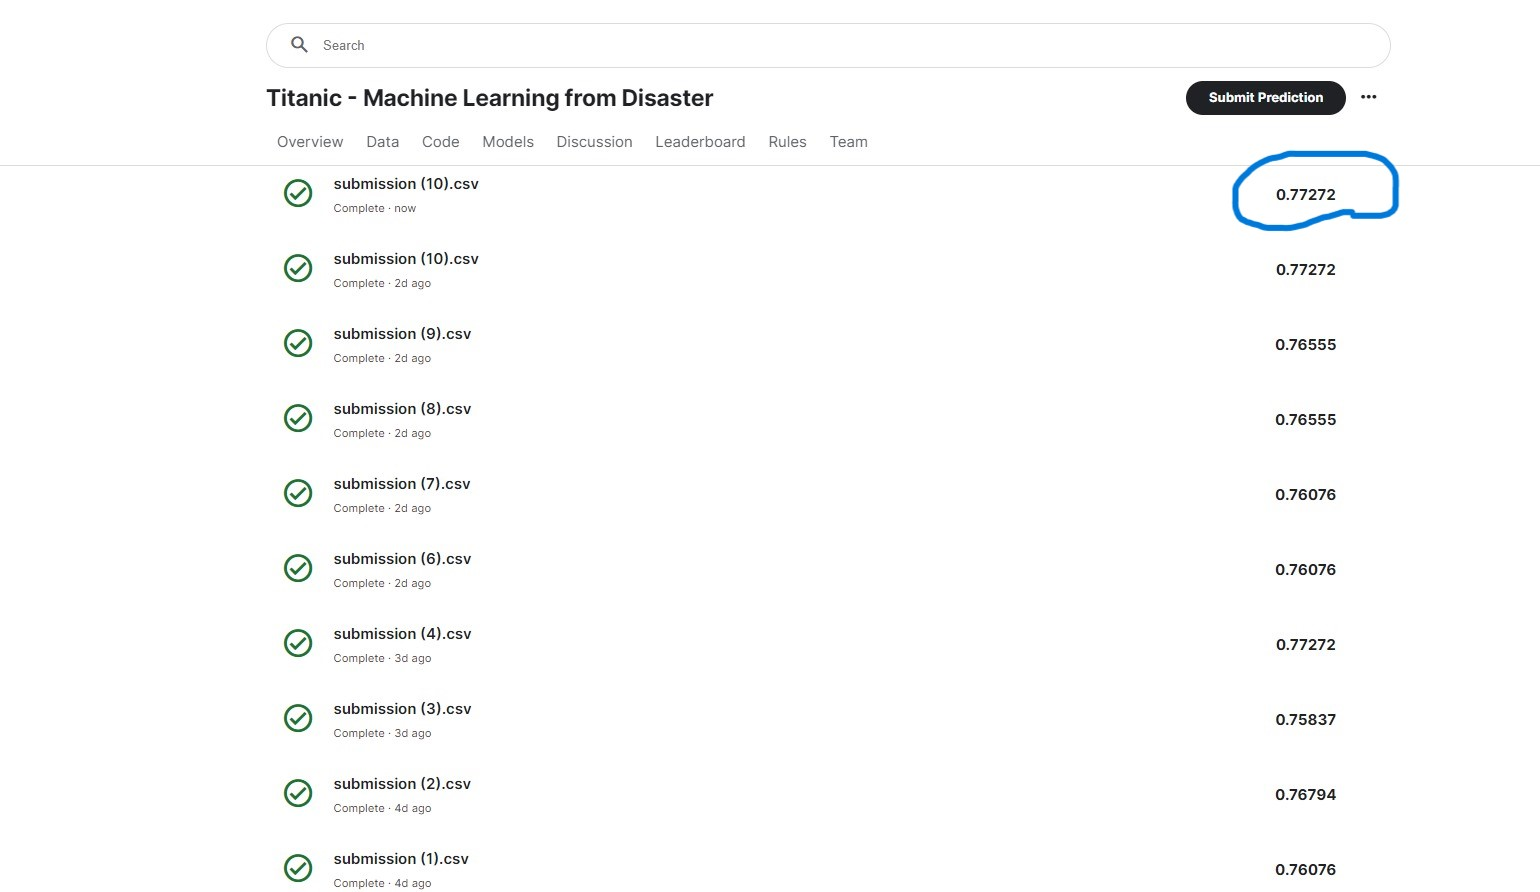

# Summary


**After researching and analyzing the data, we built a new fare/class feature, but the exact model did not help us. We found the optimal division between training (90%) and training (10%).
  We made a comparison between two SGD and MLP models, the conclusions from this comparison were that SGD brought us higher accuracy and lower loss, therefore we chose to use the SGD model.
We also performed several comparisons to determine the optimal hyperparameters that will bring us a more accurate model, the hyperparameters we tested are: learning rate, epochs,
After comparison we found that the optimal parameters are: epochs=40000 and learning rate=0.01.
After that the model was tested on the test and the highest result: 0.7727.**

# reference

The practice notebooks with Shira.

# **Assignment3**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score, make_scorer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve, train_test_split)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
# get score with nfold bagging
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
import plotly.graph_objects as go
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


In [48]:
 from sklearn.model_selection import train_test_split
t = train_dataFor3['Survived'].copy()
X = train_dataFor3.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)
X_train, X_val, t_train, t_val = train_test_split(X,t,test_size=0.1,random_state=42)


t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,3,22.0,1,0,7.2500,81,2,1
1,1,38.0,1,0,71.2833,81,0,0
2,3,26.0,0,0,7.9250,97,2,0
3,1,35.0,1,0,53.1000,55,2,0
4,3,35.0,0,0,8.0500,20,2,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,29,2,1
887,1,19.0,0,0,30.0000,30,2,0
888,3,28.0,1,2,23.4500,20,2,0
889,1,26.0,0,0,30.0000,60,0,1


In [49]:

def make_confusion_matrix(cm_train, cm_val, train_title='train confusion matrix',val_title='val confusion matrix', cmap='binary'):
  tn, fp, fn, tp = cm_train.ravel()
  tn2, fp2, fn2, tp2 = cm_val.ravel()
  labels_train = [f'True Neg\n {tn}', f'False Pos\n{fp}',f'False Neg{fp}', f'True Pos{tp}']
  labels_val = [f'True Neg\n {tn2}', f'False Pos\n{fp2}',f'False Neg{fp2}', f'True Pos{tp2}']
  labels_train = np.asarray(labels_train).reshape(2,2)
  labels_val = np.asarray(labels_val).reshape(2,2)
  cm_train = pd.DataFrame(cm_train)
  cm_val = pd.DataFrame(cm_val)
  fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
  sns.heatmap(cm_train, annot=labels_train, fmt='', cmap=cmap, ax=ax1).set_title(train_title)
  sns.heatmap(cm_val, annot=labels_val, fmt='', cmap=cmap, ax=ax2).set_title(val_title)

In [50]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

# calculate f1 and balanced accuracy
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

def balanced_accuracy(cm):
    recall_calc = recall(cm)
    specificity_calc = specificity(cm)
    return (recall_calc+specificity_calc)/2

def calc_metrics(cm):
  return {
      'precision': precision(cm),
      'recall': recall(cm),
      'specificity': specificity(cm),
      'fpr': fpr(cm),
      'accuracy': accuracy(cm),
      'f1': f1(cm),
      'balanced accuracy': balanced_accuracy(cm),
  }

In [51]:


# print all metrics from confusion_matrix for train and validation
def print_confusion_matrix(model, cm_train, cm_val):
  cm_train_df = pd.DataFrame(cm_train, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])
  cm_val_df = pd.DataFrame(cm_val, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])

  print('Confusion Matrix')
  fig, ax = plt.subplots(ncols=2, figsize=(10,3))
  for i, (df, title) in enumerate(zip([cm_train_df, cm_val_df], ['Train', 'Validation'])):
    fig = sns.heatmap(df, annot=True, ax=ax[i], cmap=plt.cm.Pastel1, fmt='g')
    fig.set_title(title)
  plt.subplots_adjust(top=1.5, bottom=0, left=0, right=1)
  plt.show()

  display(pd.DataFrame({ 'Train': calc_metrics(cm_train), 'Validation': calc_metrics(cm_val) }))

# Cross Validation

In [52]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
  scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

  if k is not None:
    cv = KFold(n_splits=k, shuffle=True, random_state=2)
  elif p is not None:
    cv = LeavePOut(p)
  else:
    raise ValueError("Must specify either `K` or `P`.")

  if use_pbar:
    pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

  for i, (train_ids, val_ids) in enumerate(cv.split(X)):
    X_train = X.loc[train_ids]
    t_train = t.loc[train_ids]
    X_val = X.loc[val_ids]
    t_val = t.loc[val_ids]

    model.fit(X_train, t_train)

    y_train = model.predict_proba(X_train)
    y_val = model.predict_proba(X_val)

    scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), metrics.log_loss(t_train, y_train)]
    scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), metrics.log_loss(t_val, y_val)]

    if use_pbar:
      pbar.update()

  if use_pbar:
    pbar.close()

  val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
  train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

  mean_val_score = val_scores_losses_df['score'].mean()
  mean_val_loss = val_scores_losses_df['loss'].mean()
  mean_train_score = train_scores_losses_df['score'].mean()
  mean_train_loss = train_scores_losses_df['loss'].mean()
  cm_train = confusion_matrix(t_train, model.predict(X_train))
  cm_val = confusion_matrix(t_val, model.predict(X_val))

  if show_score_loss_graphs:
    fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Validation Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
    fig.show()
    fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Validation Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    fig.show()
    print_confusion_matrix(model, cm_train, cm_val)

  return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [53]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

# Comparison between models

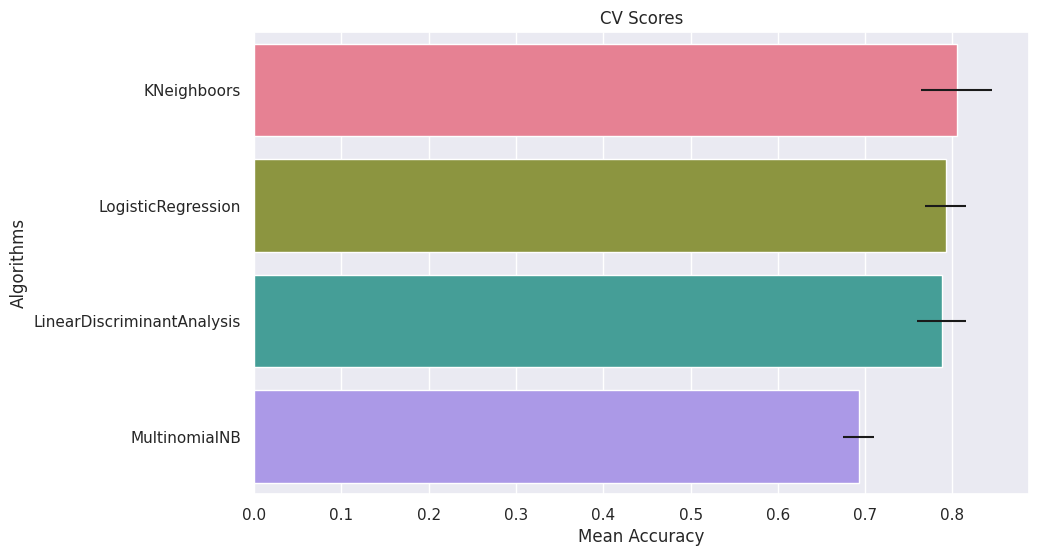

In [54]:

random_state = 42
K_fold = StratifiedKFold(n_splits=10)

models = []  # append all models or predictive models 
cv_results = []  # cross-validation result
cv_means = []  # cross-validation mean value
cv_std = []  # cross-validation standard deviation

models.append(make_pipeline(preprocessing.MinMaxScaler(), KNeighborsClassifier()))
models.append(make_pipeline(preprocessing.MinMaxScaler(), LogisticRegression()))
models.append(make_pipeline(preprocessing.StandardScaler(), LinearDiscriminantAnalysis()))
models.append(make_pipeline(preprocessing.MinMaxScaler(), MultinomialNB()))

for model in models:
    cv_results.append(cross_val_score(model, X, t, 
                                      scoring="accuracy", cv=K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# Corrected list of algorithms
algorithms = [
    "KNeighboors",
    "LogisticRegression",
    "LinearDiscriminantAnalysis",
    "MultinomialNB"
]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans": cv_means,
        "CrossValErrors": cv_std,
        "Algorithms": algorithms
    })

# Plotting the results
plt.figure(figsize=(10, 6))
cv_plot = sns.barplot(x="CrossValMeans", y="Algorithms", data=cv_frame,
                palette="husl", orient="h", xerr=cv_std)

cv_plot.set_xlabel("Mean Accuracy")
cv_plot.set_title("CV Scores")
plt.show()


According to a comparison, it can be seen that the KNN model gave us the highest accuracy, so we chose it

<Axes: >

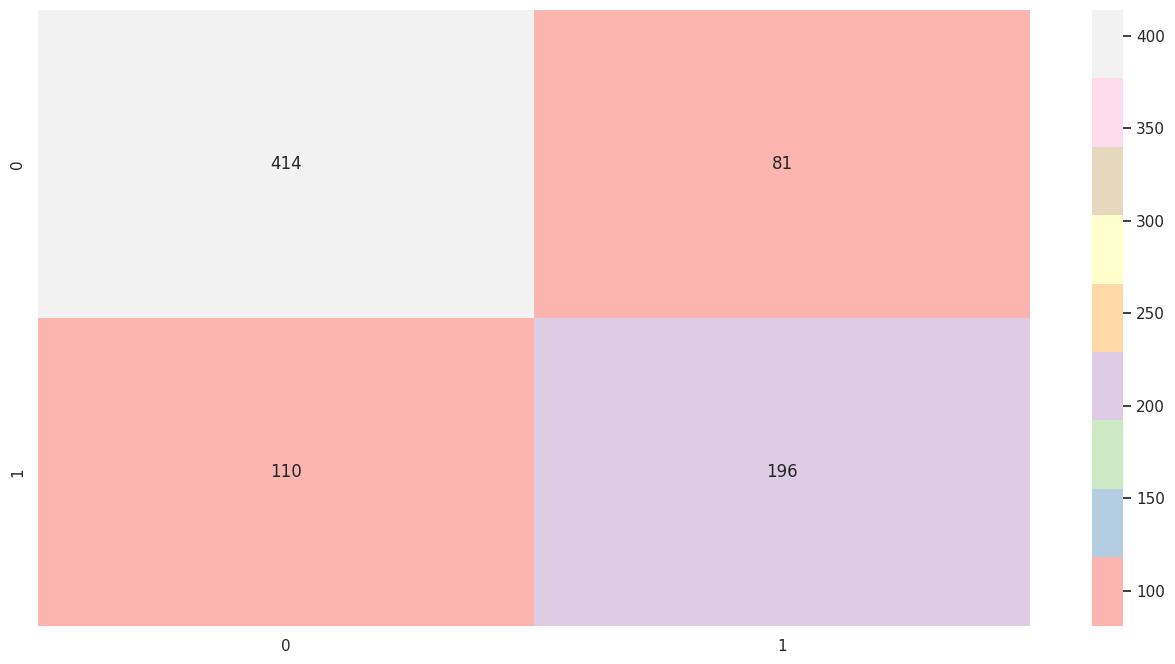

In [55]:
clf =KNeighborsClassifier()
clf.fit(X_train,t_train)
y_train = clf.predict(X_train)
y_val = clf.predict(X_val)
cm_train = confusion_matrix(t_train, y_train)
cm_val = confusion_matrix(t_val, t_val)
sns.heatmap(cm_train, annot=True, cmap=plt.cm.Pastel1, fmt='g')

Based on our analysis of the confusion matrix, it's evident that our model exhibits minimal false negatives (FN) and false positives (FP). Given these observations, we anticipate that Precision will exceed Recall. This anticipation stems from the fact that the proportion of FN relative to predicted positives is approximately 25%, while the proportion of FN relative to actual positives is around 24%. Consequently, we estimate Precision to be roughly 0.8 and Recall to be approximately 0.73.

**Note: In this context, "Negative" signifies "Died" and "Positive" signifies "Survived."**

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Confusion Matrix


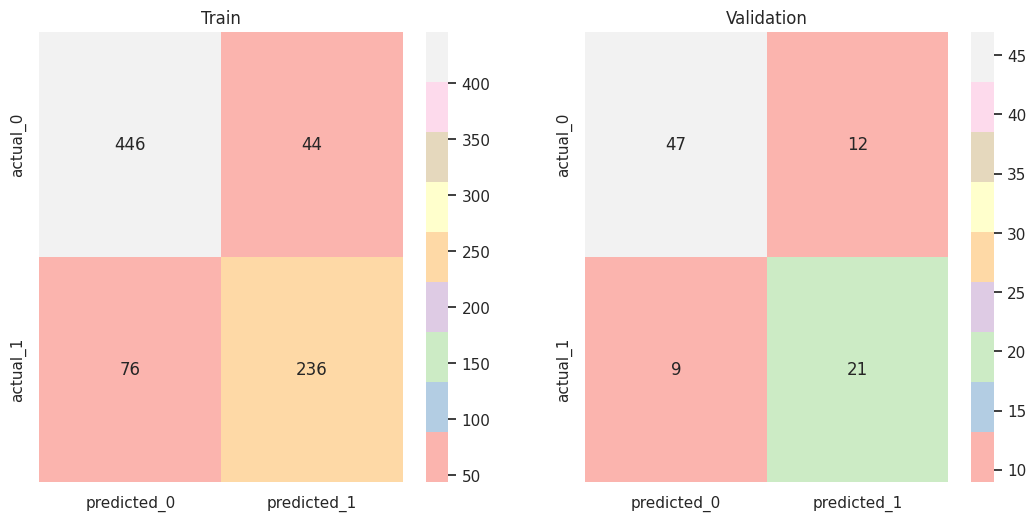

,Train,Validation
precision,0.842857,0.636364
recall,0.756410,0.700000
specificity,0.910204,0.796610
fpr,0.089796,0.203390
accuracy,0.850374,0.764045
f1,0.797297,0.666667
balanced accuracy,0.833307,0.748305


mean cv val score: 0.80
mean cv val loss 1.86
mean cv train score: 0.85
mean cv train loss 0.30


In [56]:

model_pipe = make_pipeline(preprocessing.MinMaxScaler(), KNeighborsClassifier())
val_score, val_loss, train_score, train_loss =get_cv_score_and_loss(X, t,model_pipe,k=10, p=None,show_score_loss_graphs=True,use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')


Based on our observations, the Precision and Recall values align closely with our initial estimates, while the specificity exceeds both. This isn't surprising, given the relatively low proportion of false positives among all true negatives (approximately 11%). Consequently, our F1 score and Balanced Accuracy were derived accordingly. Furthermore, when considering the Accuracy calculated from the Confusion Matrix, it's evident that our model leans towards predicting negative outcomes (e.g., passenger deaths) rather than positive ones (e.g., survivals). This conservative tendency underscores the prioritization of predicting negative instances.

# KNN

find best K by R2 and accuracy

In [57]:
# run KNN on the dataset and find best K by R2 and accuracy
X_normalized = preprocessing.MinMaxScaler().fit_transform(X)
arr_X_normalized = np.asarray(X_normalized)                                       
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_jobs=10, p=1), hyper_parameters, cv=14,).fit(arr_X_normalized, t)
print('Accuracy score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for regression:
gs_neigh_model 0.8115079365079366
best params {'n_neighbors': 11}


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Confusion Matrix


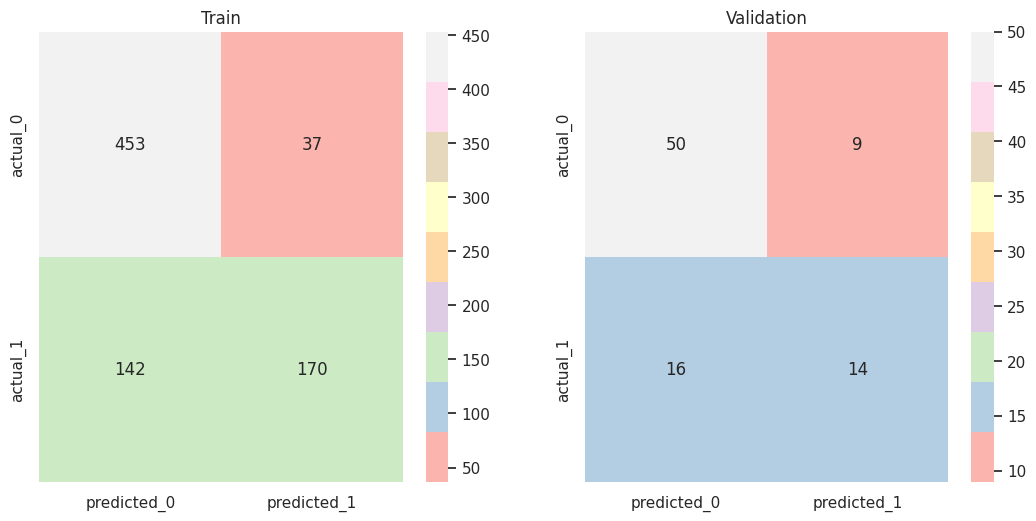

,Train,Validation
precision,0.821256,0.608696
recall,0.544872,0.466667
specificity,0.924490,0.847458
fpr,0.075510,0.152542
accuracy,0.776808,0.719101
f1,0.655106,0.528302
balanced accuracy,0.734681,0.657062


mean cv val score: 0.70
mean cv val loss 1.34
mean cv val score: 0.77
mean cv val loss 0.46


In [58]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, gs_neigh_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

 According to the results, it can be seen that when n_neighbors=6 we got the highest accuracy when using the KNN model.

# Ensembles - "The wisdom of the crowd"
# 

In [59]:
X_normalized =preprocessing.MinMaxScaler().fit_transform(X)


# BaggingClassifier

nfold

In [60]:

bag_fold_model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                   n_estimators=20, random_state=42,
                                   bootstrap=False).fit(X_normalized, t)

print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_normalized, t).mean())

Accuracy score for classification:
bag_fold_model 0.8518518518518519


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estim

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Confusion Matrix


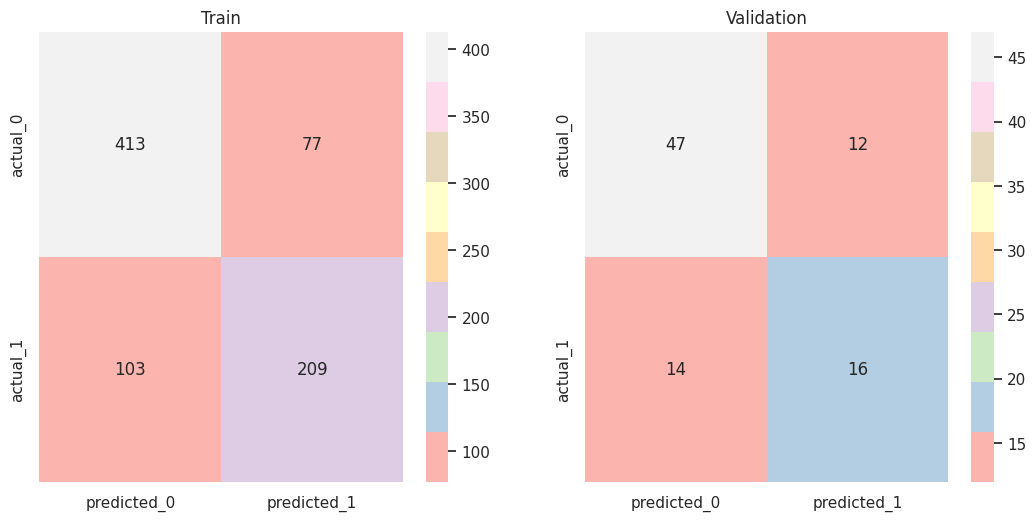

,Train,Validation
precision,0.730769,0.571429
recall,0.669872,0.533333
specificity,0.842857,0.796610
fpr,0.157143,0.203390
accuracy,0.775561,0.707865
f1,0.698997,0.551724
balanced accuracy,0.756364,0.664972


mean cv val score: 0.66
mean cv val loss 2.23
mean cv val score: 0.77
mean cv val loss 0.45


In [61]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, bag_fold_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

# bootstrap

In [62]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                   n_estimators=20, random_state=42,
                                   bootstrap=True).fit(X_normalized, t)

print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(X_normalized, t).mean())

Accuracy score for classification:


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



bag_boot_model 0.8552188552188552


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estim

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Confusion Matrix


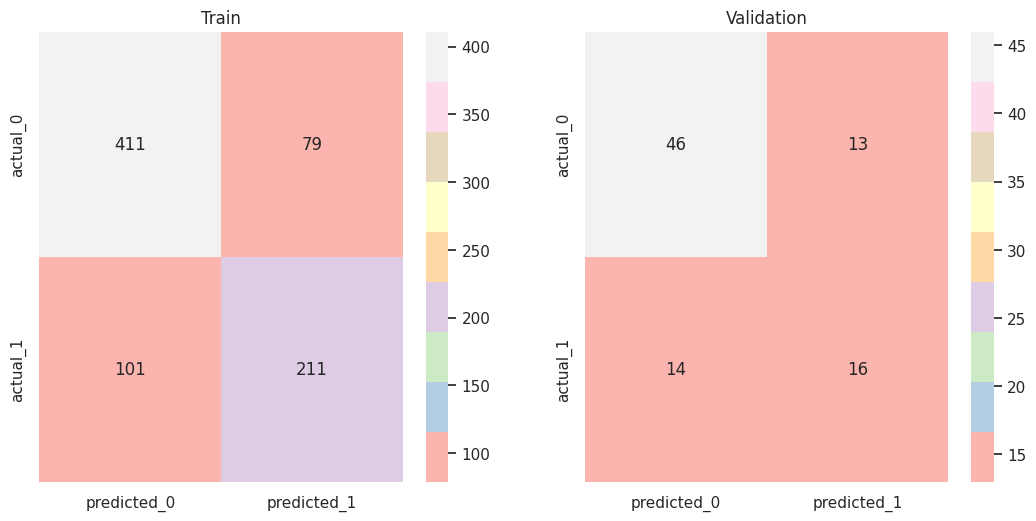

,Train,Validation
precision,0.727586,0.551724
recall,0.676282,0.533333
specificity,0.838776,0.779661
fpr,0.161224,0.220339
accuracy,0.775561,0.696629
f1,0.700997,0.542373
balanced accuracy,0.757529,0.656497


mean cv val score: 0.67
mean cv val loss 1.11
mean cv val score: 0.79
mean cv val loss 0.44


In [63]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, bag_boot_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

According to a comparison we made between these two ensembles we decided to choose BaggingClassifier because it gave us the best accuracy.

# Feature Selection
# Backward

When we chose the KNN model we will notice that it is not possible to carry out Feature Selection:Backward therefore we can not run it out

# Forward

In [64]:
from sklearn.feature_selection import SequentialFeatureSelector

ct_enc_std = preprocessing.MinMaxScaler()

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=X.columns)

ridge = RidgeCV().fit(X_encoded,t)
sfs_forward = SequentialFeatureSelector(
    ridge,tol=0.001,n_features_to_select='auto',direction="forward"
).fit(X_encoded,t)
selected_feature_indices = np.where(sfs_forward.get_support())[0]

# Get the corresponding column names from X_encoded
selected_feature_names = X_encoded.columns[selected_feature_indices]

print(
    "Features selected by forward sequential selection: ",
    f"{selected_feature_names}"
)
print("number of features: ",len(selected_feature_names))
X_best_featuresForward=X_encoded.loc[:, selected_feature_names]
X_best_featuresForward

Features selected by forward sequential selection:  Index(['Pclass', 'Age', 'SibSp', 'Embarked', 'Sex_male'], dtype='object')
number of features:  5


,Pclass,Age,SibSp,Embarked,Sex_male
0,1.0,0.271174,0.125,1.0,1.0
1,0.0,0.472229,0.125,0.0,0.0
2,1.0,0.321438,0.000,1.0,0.0
3,0.0,0.434531,0.125,1.0,0.0
4,1.0,0.434531,0.000,1.0,1.0
...,...,...,...,...,...
886,0.5,0.334004,0.000,1.0,1.0
887,0.0,0.233476,0.000,1.0,0.0
888,1.0,0.346569,0.125,1.0,0.0
889,0.0,0.321438,0.000,0.0,1.0


# Hyper-Parameters Search

# grid search

In [65]:
# train with grid search and get best parameters
XNorm=preprocessing.MinMaxScaler().fit_transform(X_best_featuresForward)
# Parameters to search
hyper_parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30, 40],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2],  # Power parameter for the Minkowski metric
}

gs_model = GridSearchCV(KNeighborsClassifier(),hyper_parameters).fit(XNorm, t)

print('Accuracy score for KNeighborsClassifier:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for KNeighborsClassifier:
gs_model 0.8080848659845585
best params {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


# random search

In [66]:
from scipy.stats import uniform,randint
from sklearn.model_selection import RandomizedSearchCV
# train with random search and get best parameters
np.random.seed(1)
param_dist = {
    'n_neighbors': randint(1, 50),  # Number of neighbors
    'p': [1, 2],  # Power parameter for Minkowski distance (1: Manhattan, 2: Euclidean)
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': randint(10, 50),  # Leaf size passed to BallTree or KDTree
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metric for the tree
    'n_jobs': [-1]  # Number of jobs to run in parallel (-1: all processors)
}


rs_model = RandomizedSearchCV(KNeighborsClassifier(), param_dist, random_state=1).fit(X_best_featuresForward, t)
print('Accuracy score for classification:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

Accuracy score for classification:
rs_model 0.8080848659845584
best params {'algorithm': 'brute', 'leaf_size': 18, 'metric': 'chebyshev', 'n_jobs': -1, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


We can see that the Grid Search give a better accuracy so we can choose his hyper parameters.

# Submission

In [67]:
bag_boot_model = BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, n_neighbors= 7, p= 2, weights= 'uniform'),
                                   n_estimators=20, random_state=42,
                                   bootstrap=True).fit(X_normalized, t)

pipe = make_pipeline(preprocessing.MinMaxScaler(),bag_boot_model)
pipe.fit(X_best_featuresForward, t)
test_data = test_data.loc[:, X_best_featuresForward.columns]
preds = pipe.predict(test_data)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



In [68]:
# create the submission file
submission['Survived'] = submission_preds
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# summary

In summary: at the beginning of our research we tested which model gives us the highest accuracy among: KNN, LDA and MNB with the help of a comparison KNN was chosen
Then we checked which parameter K of KNN contributes to us.
Later we performed a test with several ensemble models such as: BaggingClassifier
and bootstrap. Also BaggingClassifier gave us higher accuracy that's why we chose it.
In order to determine the features of the data we performed Feature Selection
which includes Backward and with its help we got the optimal pizzas.
Finally, in order to determine the Hyper-Parameters, we did two functions: grid search and random search, the grid search gave us a higher prediction, so we will use the parameters it brought us.
In conclusion, we made a submission and got a slightly better result than assignment number 1
The highest score we got: 0.77511

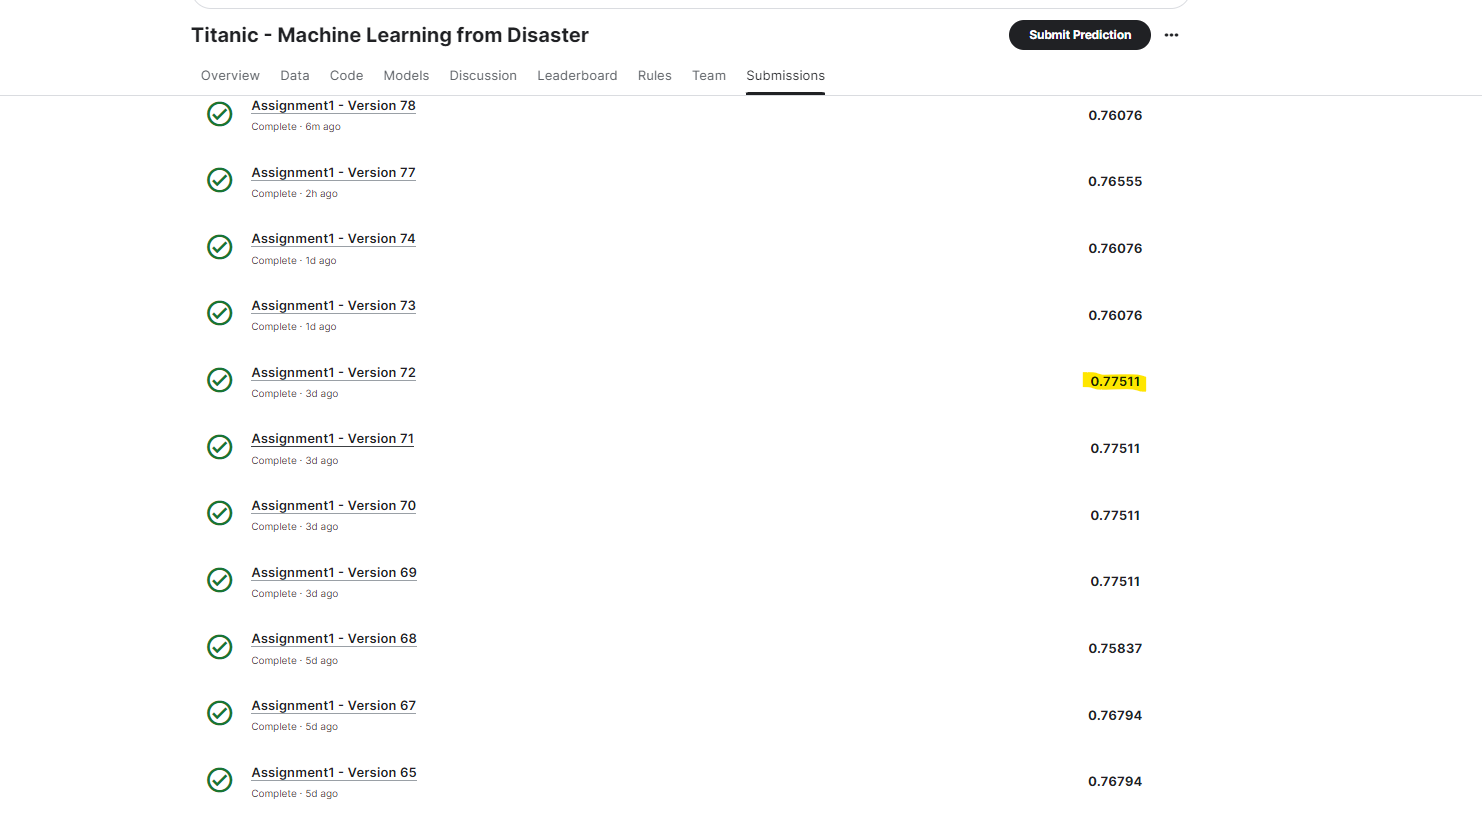

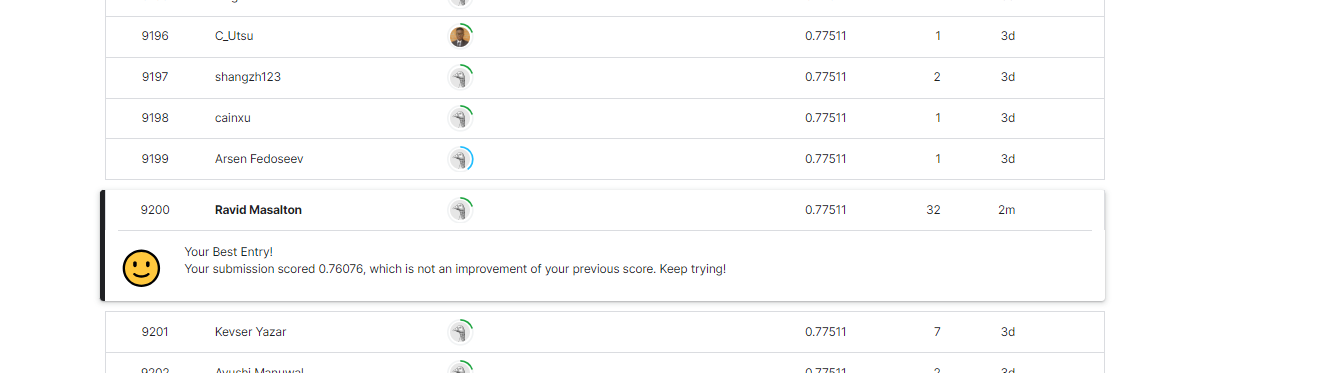